# 1. Noise Analysis

In this notebook, I will analyze the dataset corresponding to the first task - the noise analysis for sensors.

## 1.0. Loading the data

In the next cell, I read the data - there are 120 (15x8) DataFrames in total.

Note that the first two rows contain miscellaneous information - the date and time of the measurement, MFC1, MFC2, time, h...

**Each DataFrame has two columns - voltage ('V') and current (measured in 'uA', which is also the name of the second column).**

In [2]:
import pandas as pd

sensor_dataframes = []
date_times = []
MFC_t_h_list = []

for i in range(8):
    sensor_dataframes.append([])
    date_times.append([])
    MFC_t_h_list.append([])
    
for i in range(8):
    for j in range(15):
        # Define the file path
        file_path = f"20230614_CA_noise_test_chamberopen_with pins_0_0_0_{j}_{i}.csv"
        
        # Open the file and read the first two lines
        with open(file_path, "r", encoding="utf-8") as file:
            date_times[i].append(file.readline().strip())
            MFC_t_h_list[i].append(file.readline().strip())
            
        measurement = pd.read_csv(file_path, sep=';', skiprows=2)
        measurement.columns = ['V', 'uA']
        sensor_dataframes[i].append(measurement)

sensor_dataframes

[[             V        uA
  0       0.0000  0.006229
  1       0.0004  0.005828
  2       0.0008  0.003109
  3       0.0012  0.001047
  4       0.0016  0.000137
  ...        ...       ...
  24996   9.9984 -0.000026
  24997   9.9988 -0.000034
  24998   9.9992 -0.000029
  24999   9.9996 -0.000030
  25000  10.0000 -0.000045
  
  [25001 rows x 2 columns],
               V        uA
  0       0.0000  0.006229
  1       0.0004  0.005747
  2       0.0008  0.003152
  3       0.0012  0.001204
  4       0.0016  0.000330
  ...        ...       ...
  24996   9.9984 -0.000031
  24997   9.9988 -0.000030
  24998   9.9992 -0.000024
  24999   9.9996 -0.000020
  25000  10.0000 -0.000033
  
  [25001 rows x 2 columns],
               V        uA
  0       0.0000  0.006229
  1       0.0004  0.005772
  2       0.0008  0.003172
  3       0.0012  0.001215
  4       0.0016  0.000371
  ...        ...       ...
  24996   9.9984 -0.000021
  24997   9.9988 -0.000027
  24998   9.9992 -0.000025
  24999   9.9996 -0.

In [3]:
sensor_dataframes[0][0].columns

Index(['V', 'uA'], dtype='object')

## 1.1. A First Look: Plotting & Informal Analysis

To get familiar with the dataset, I plot each DataFrame and take a quick, informal look at whether there are any channels that behave differently than others.

SENSOR 0:


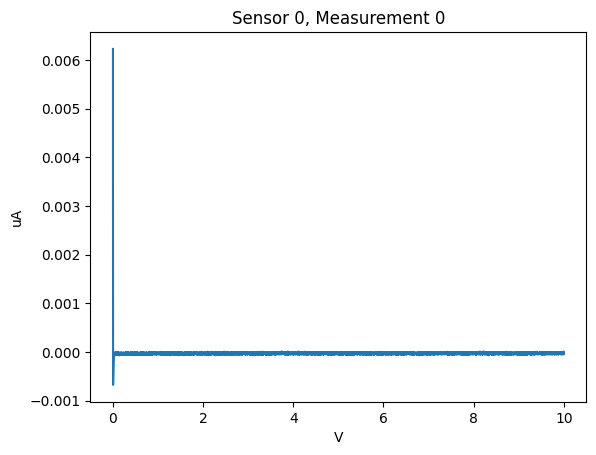

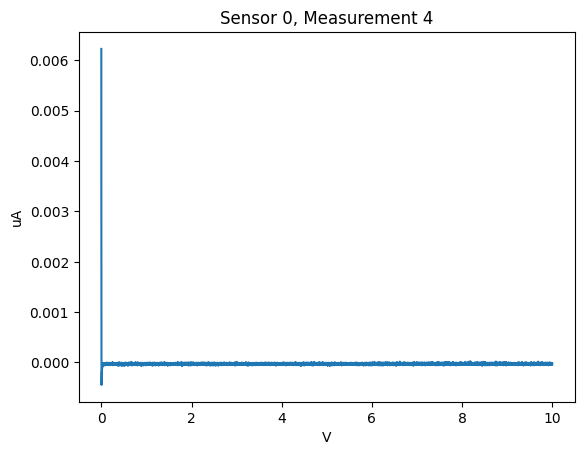

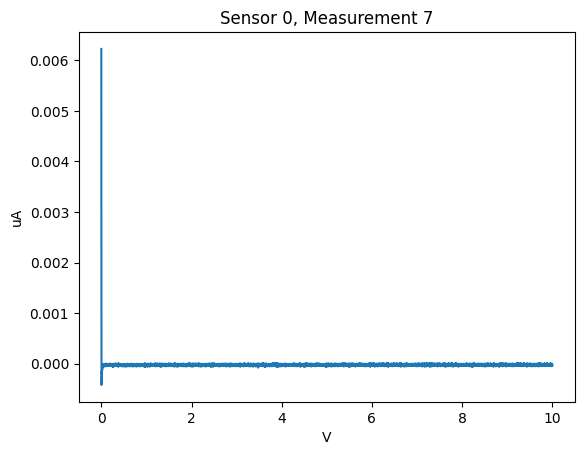

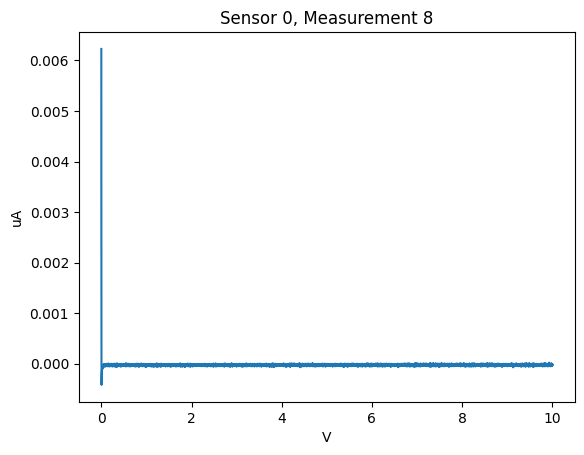

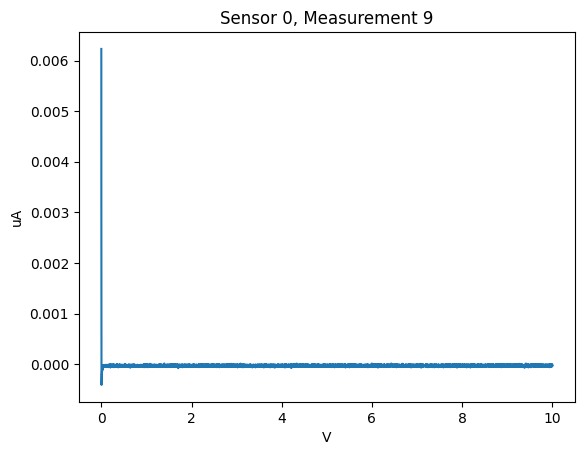

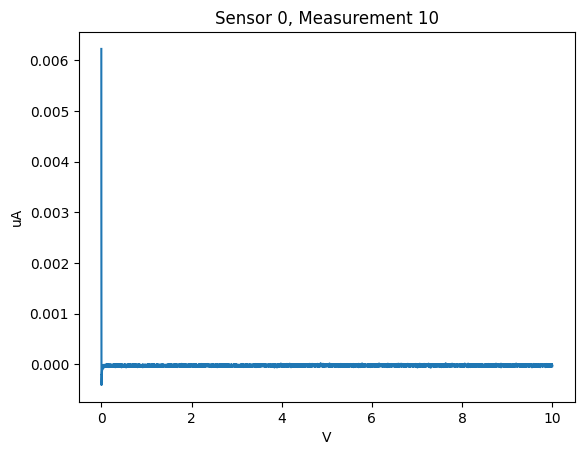

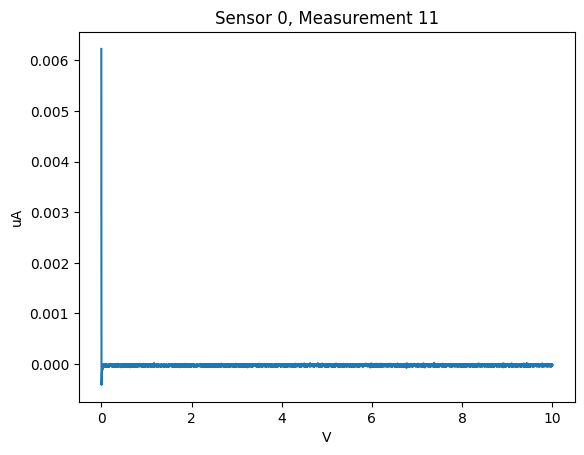

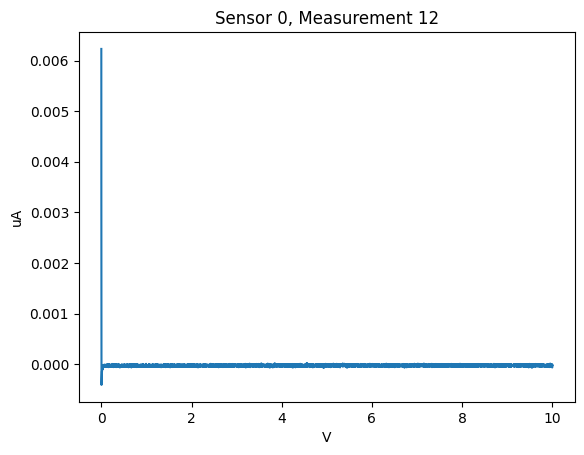

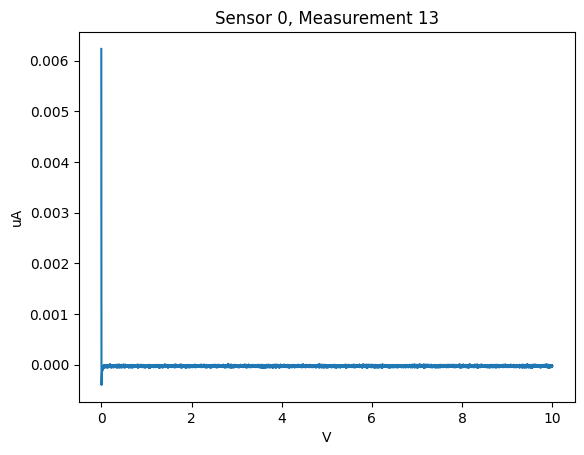

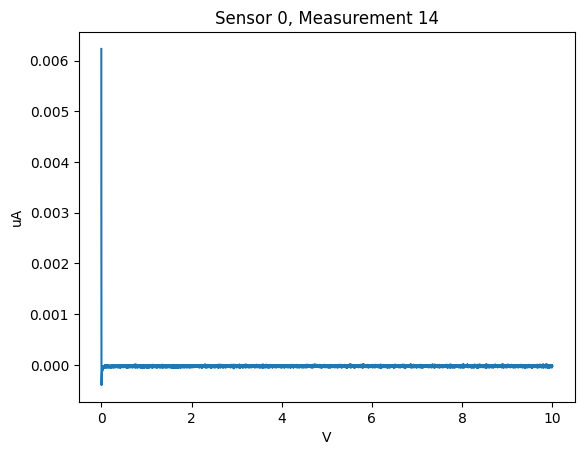

SENSOR 1:


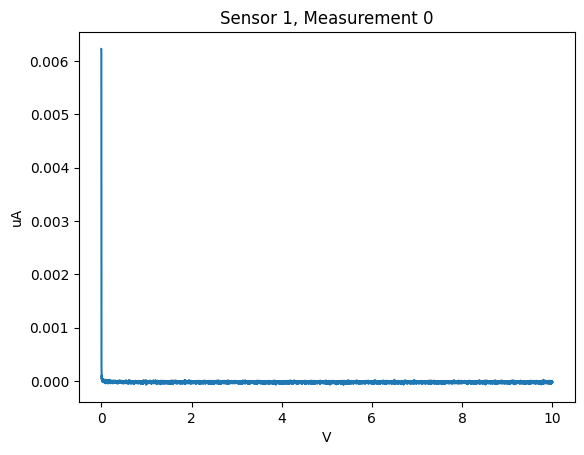

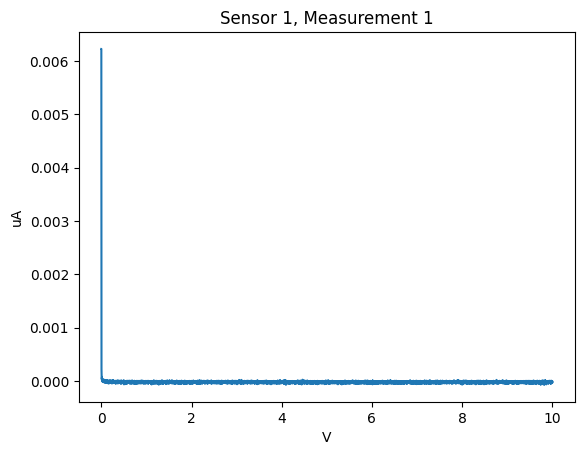

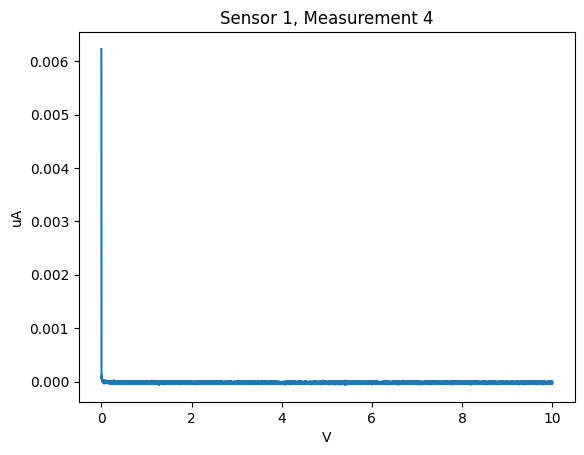

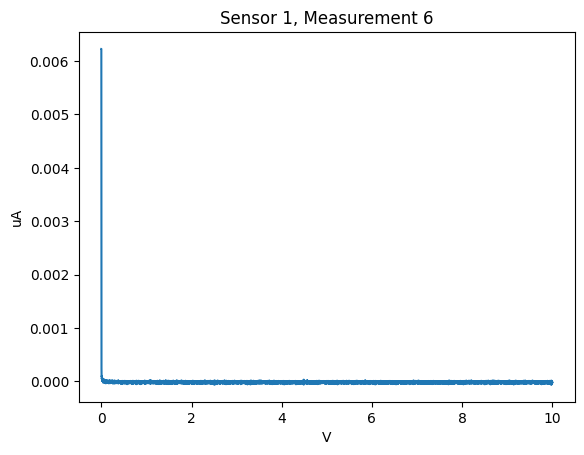

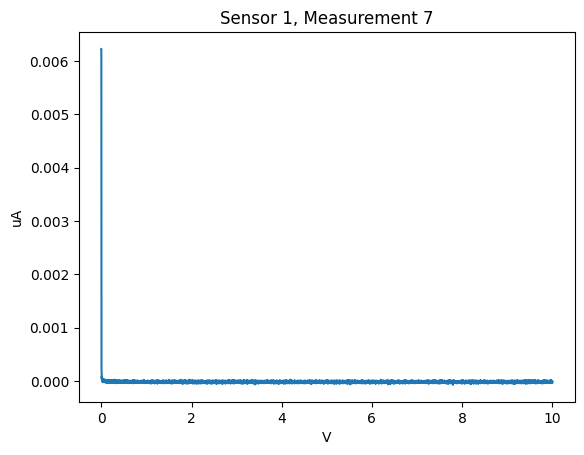

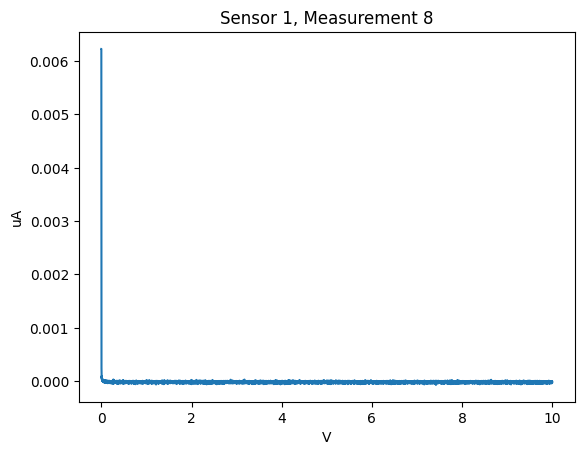

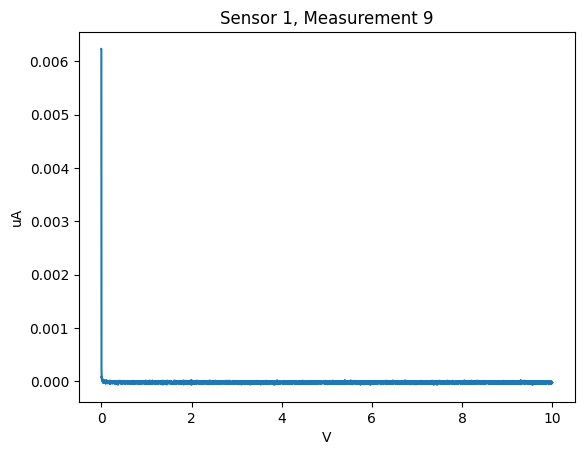

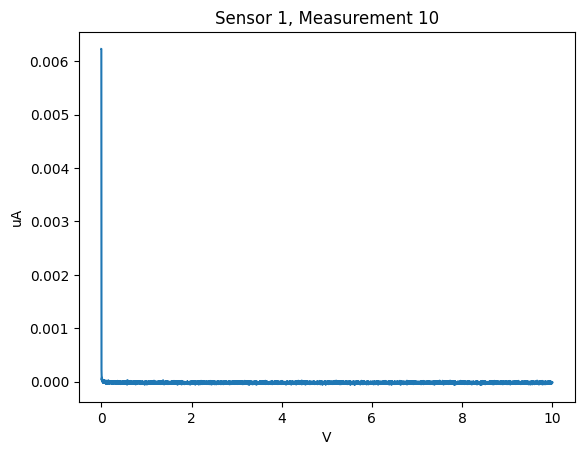

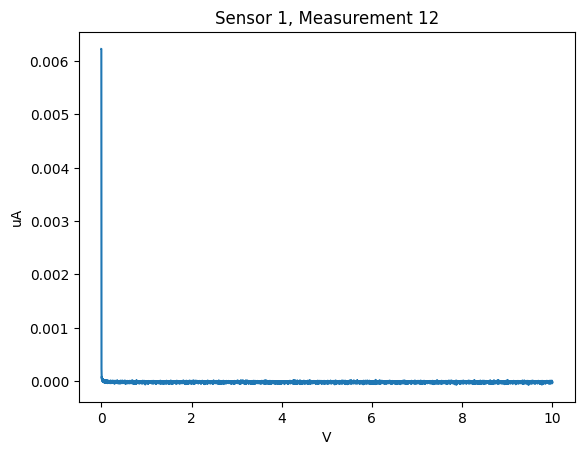

SENSOR 2:


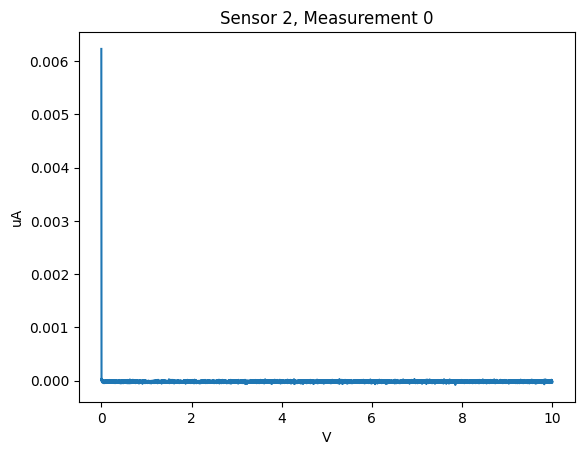

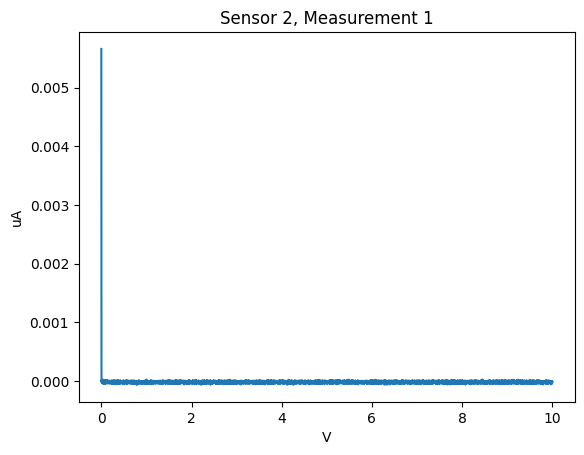

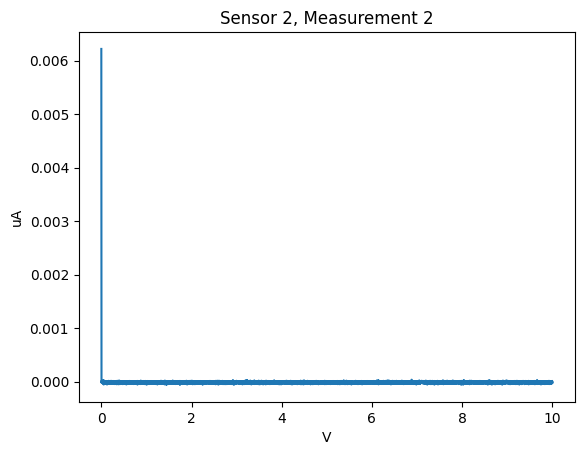

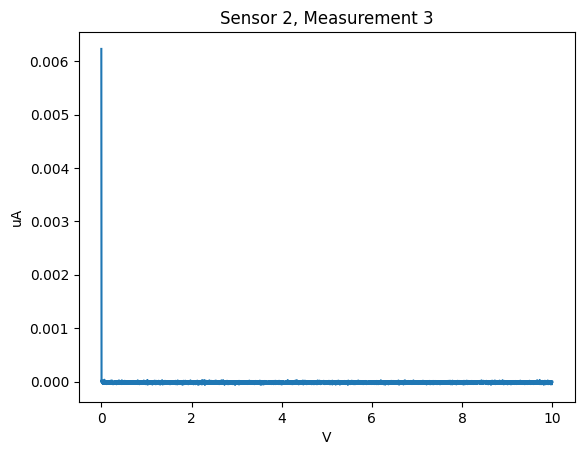

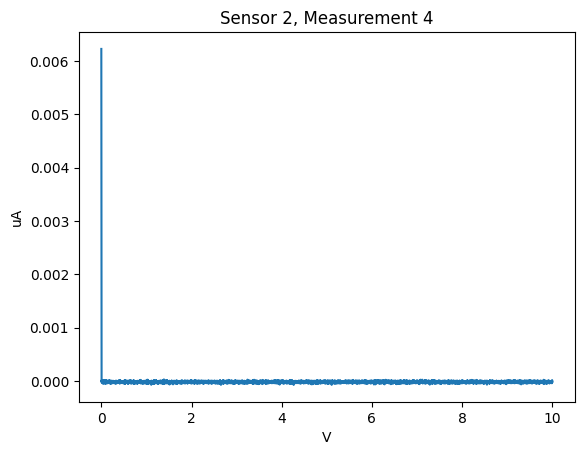

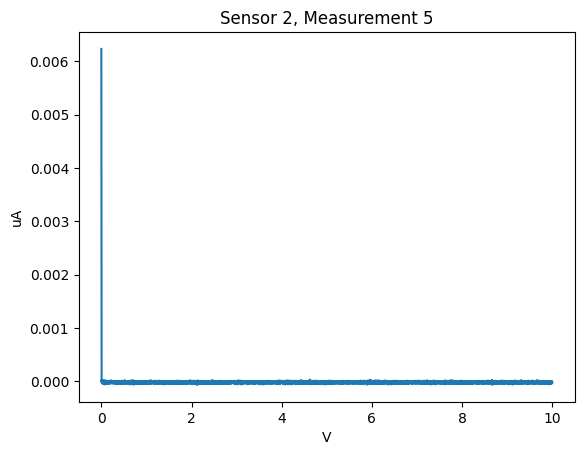

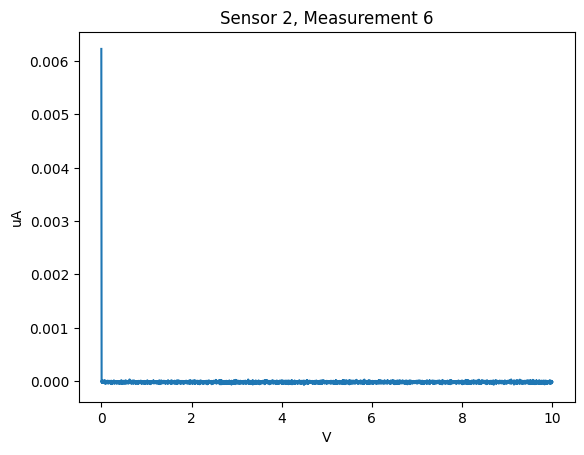

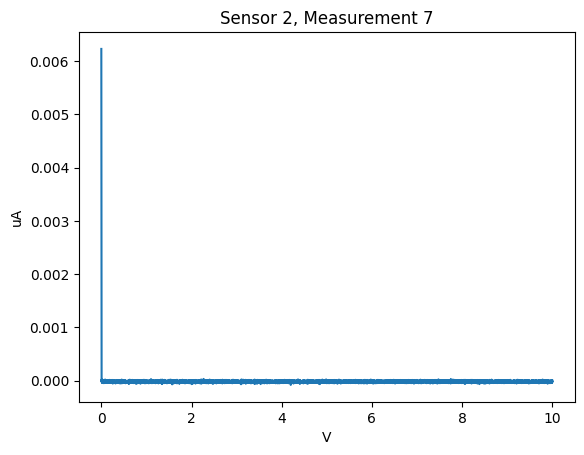

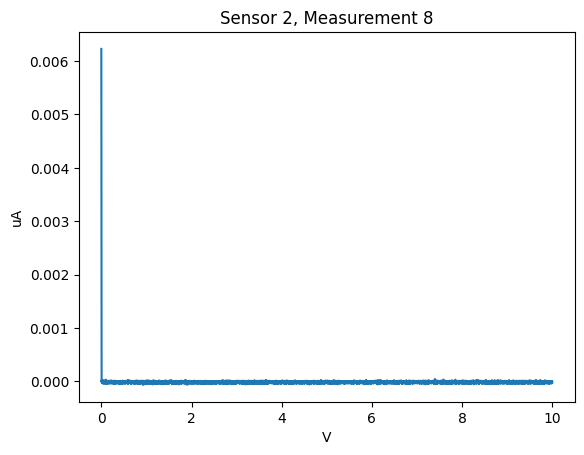

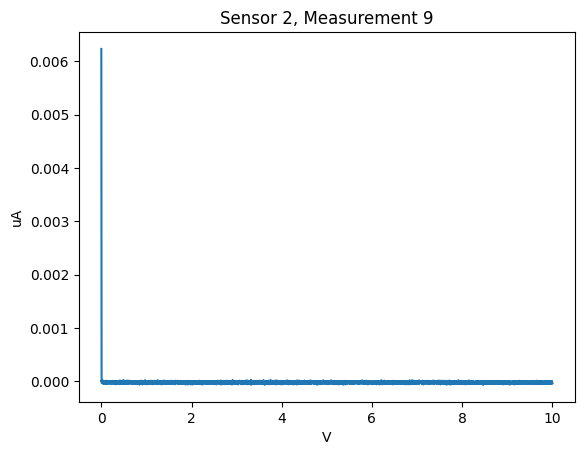

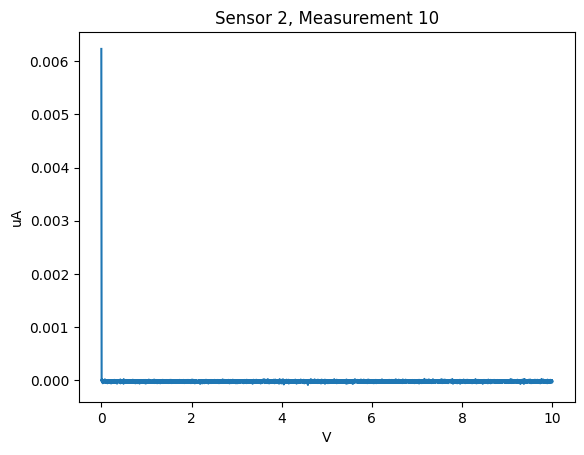

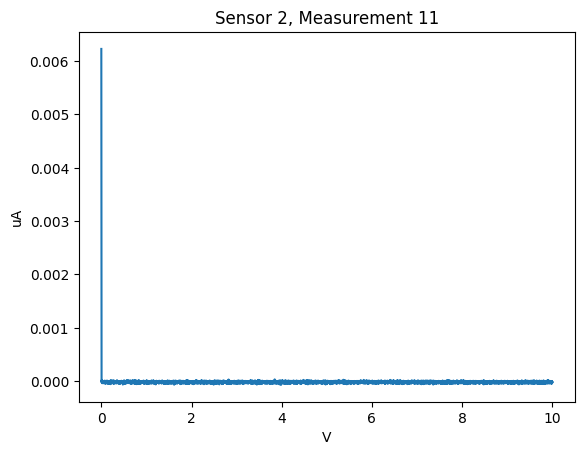

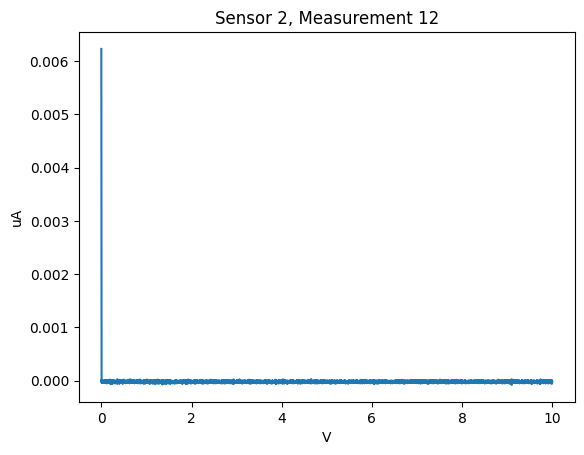

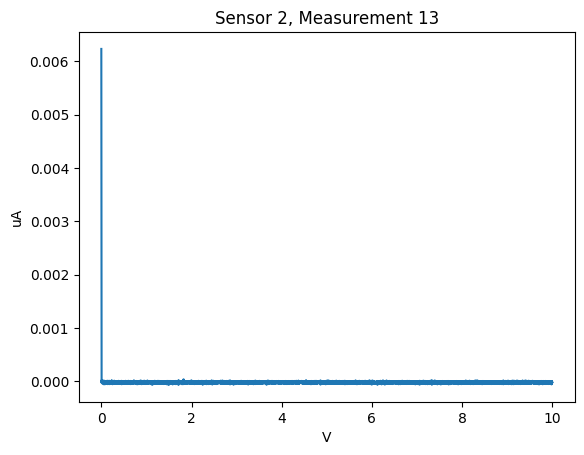

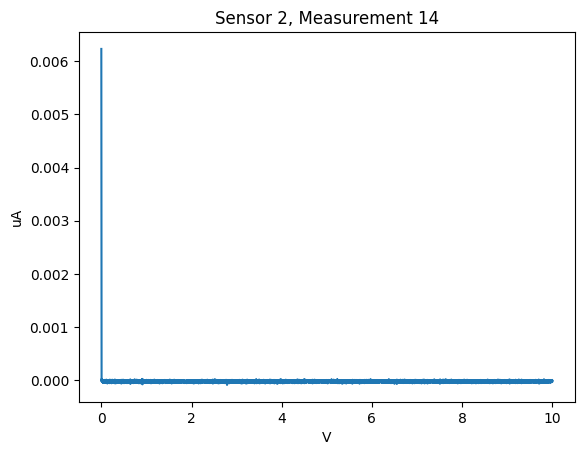

SENSOR 3:


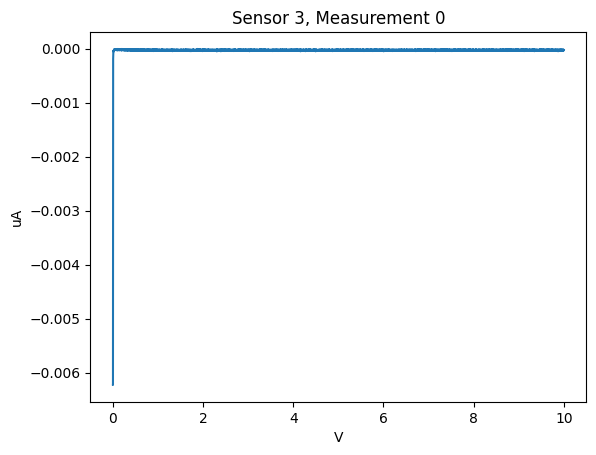

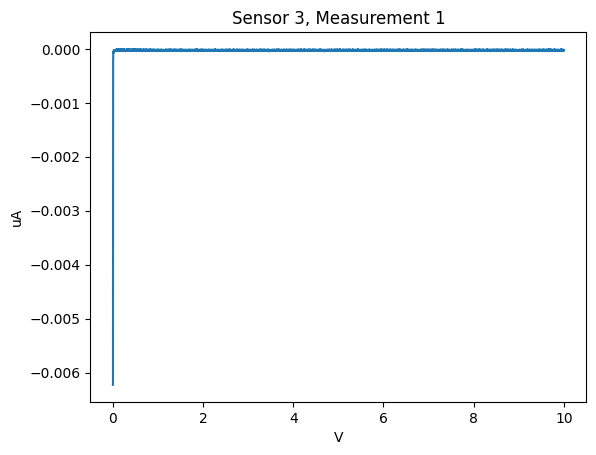

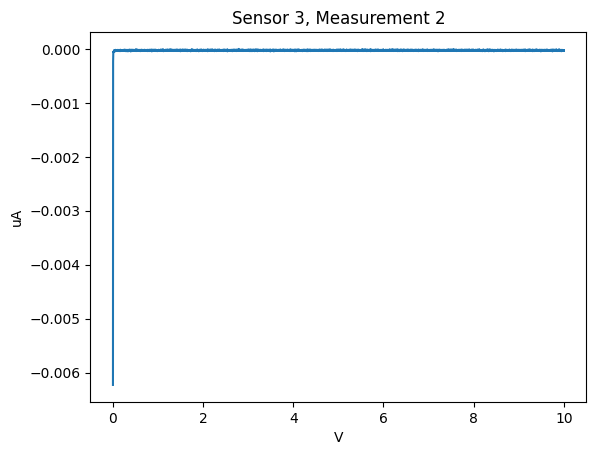

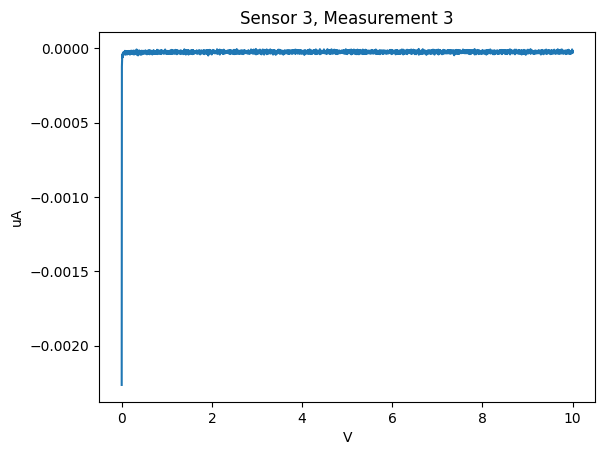

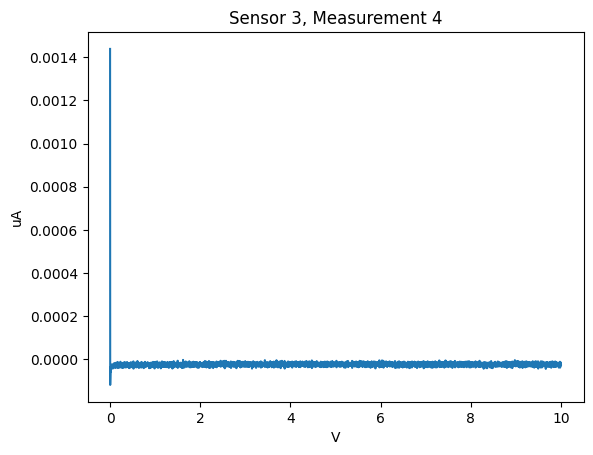

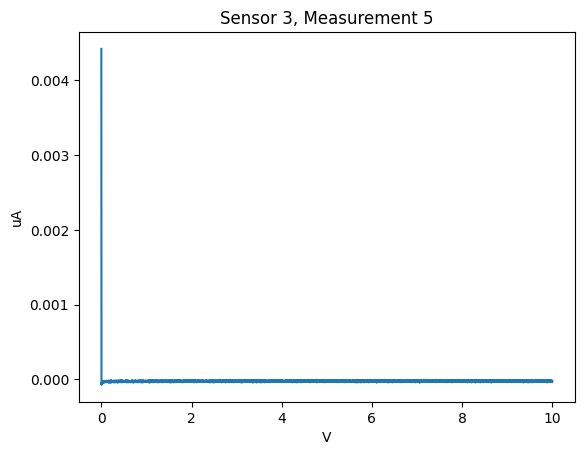

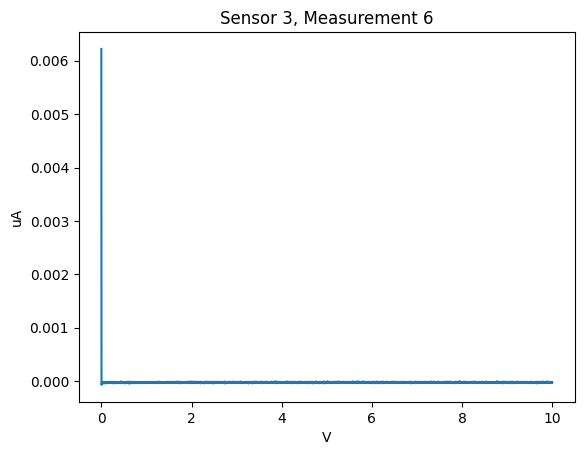

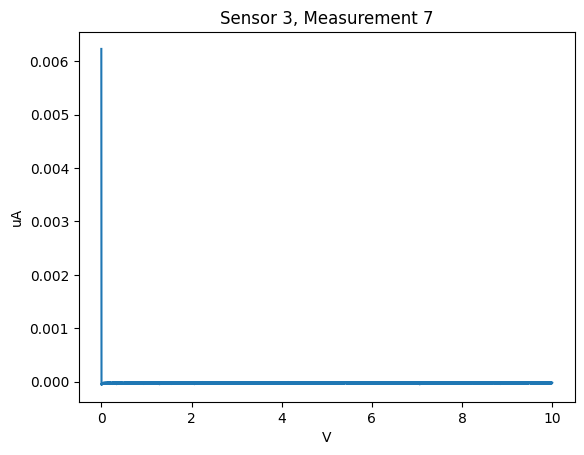

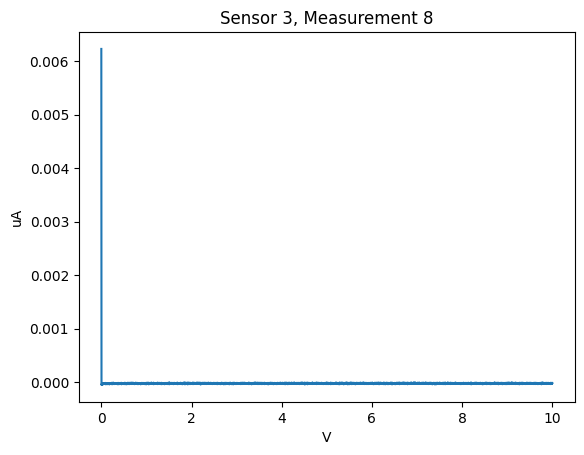

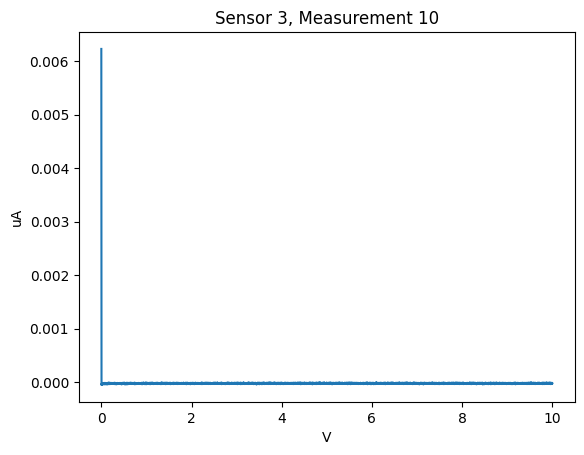

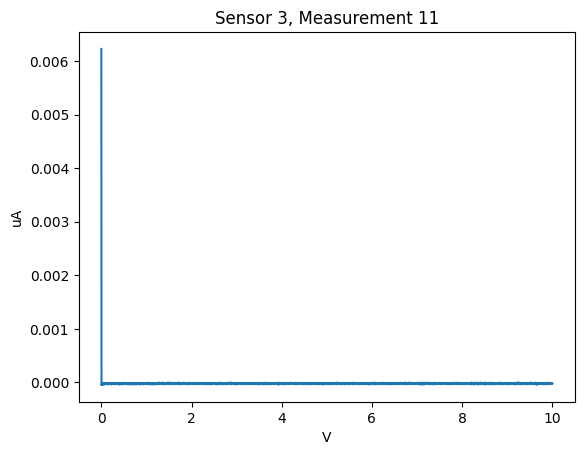

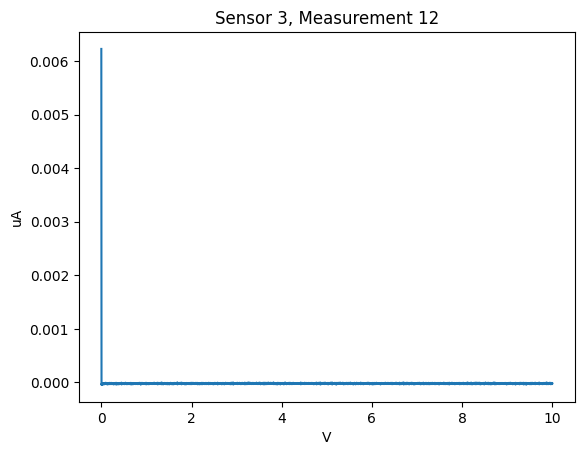

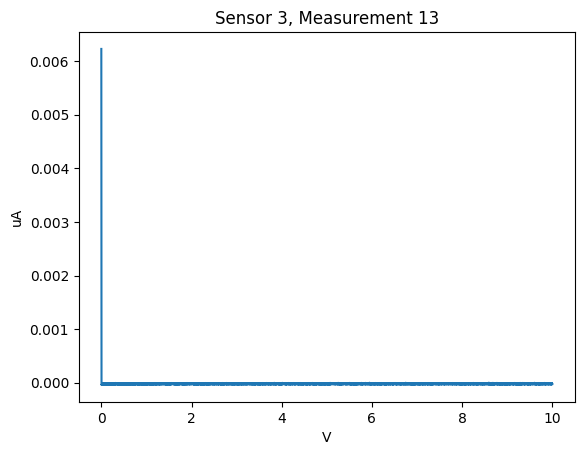

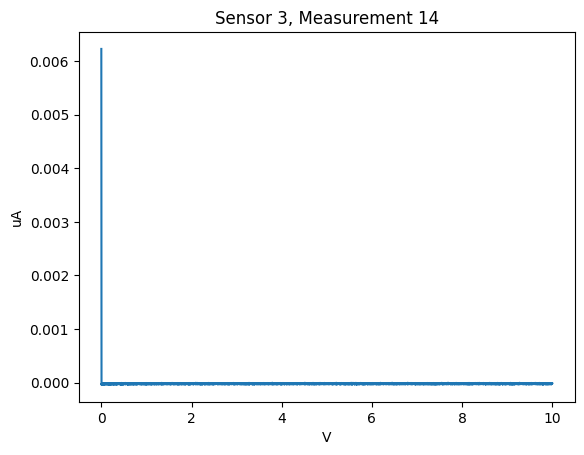

SENSOR 4:


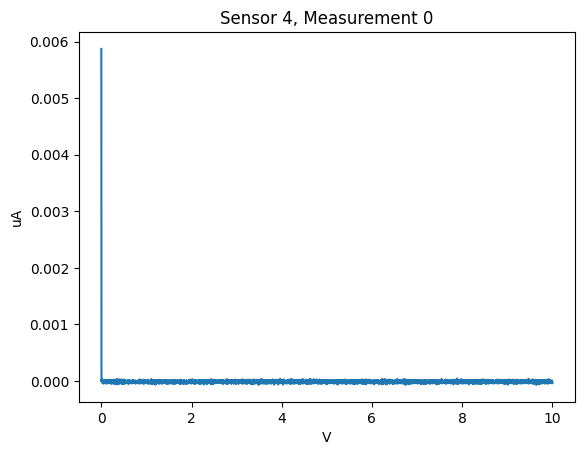

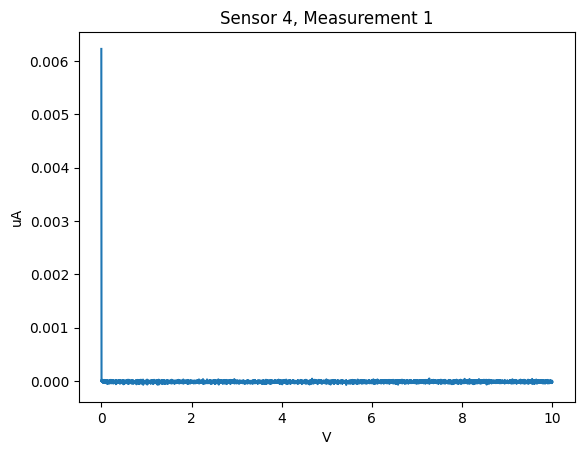

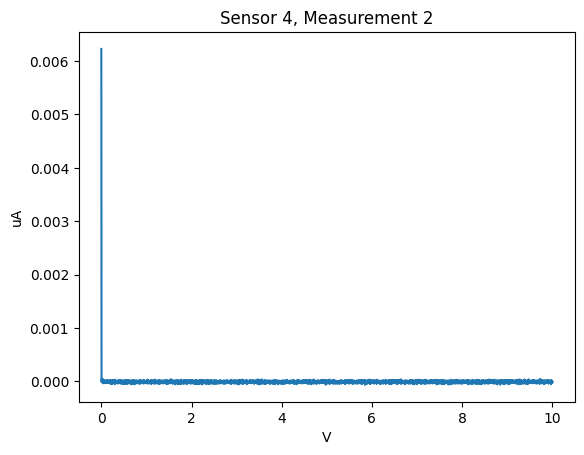

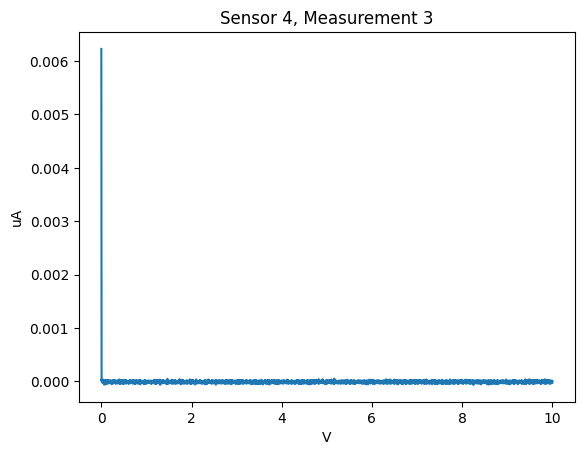

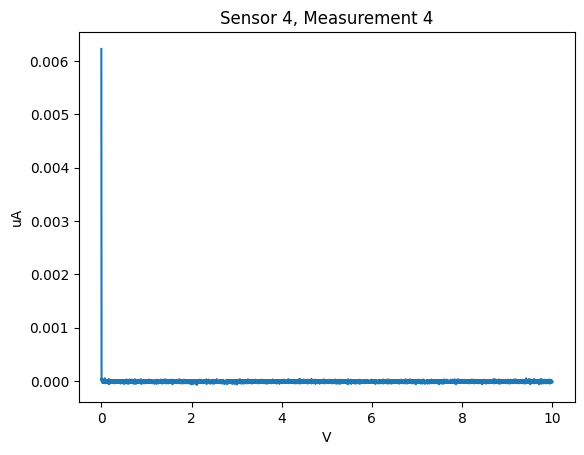

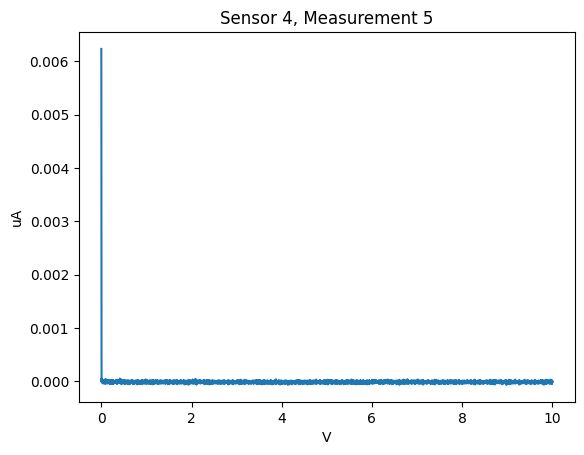

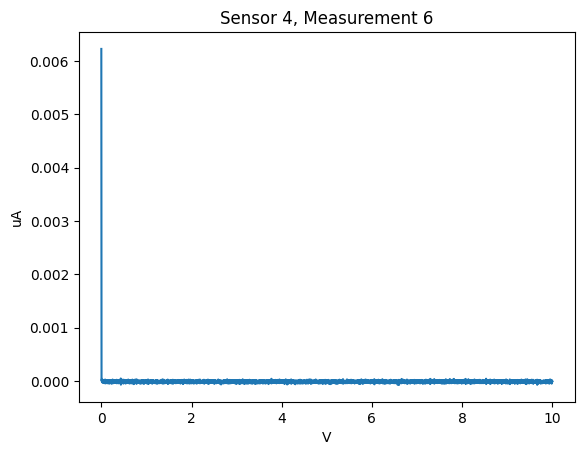

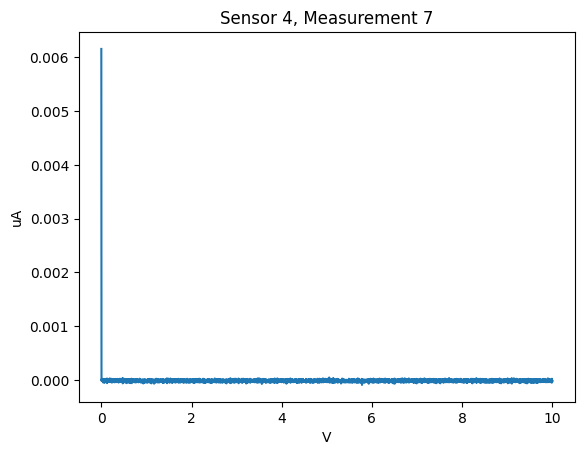

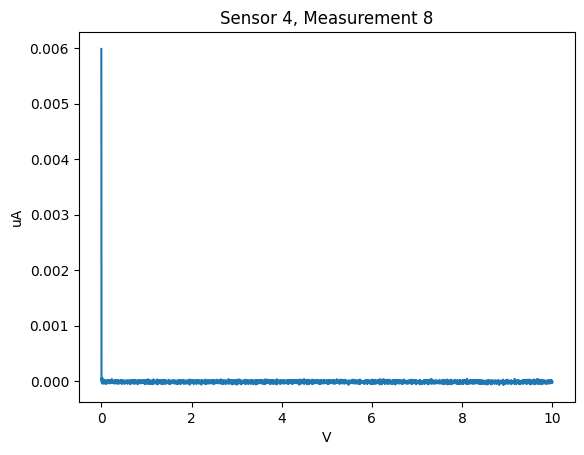

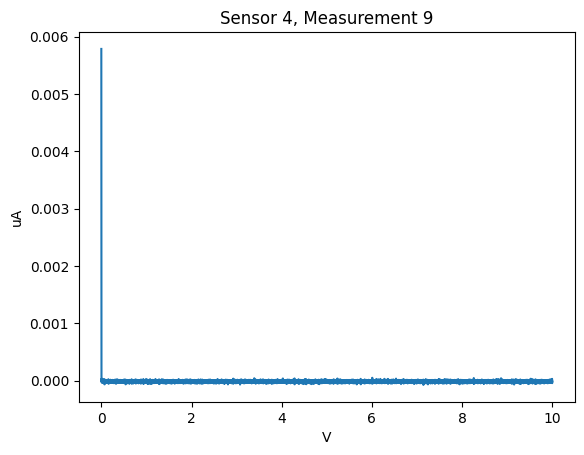

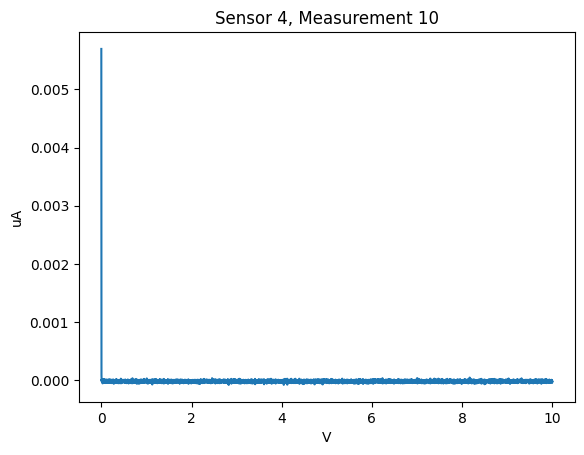

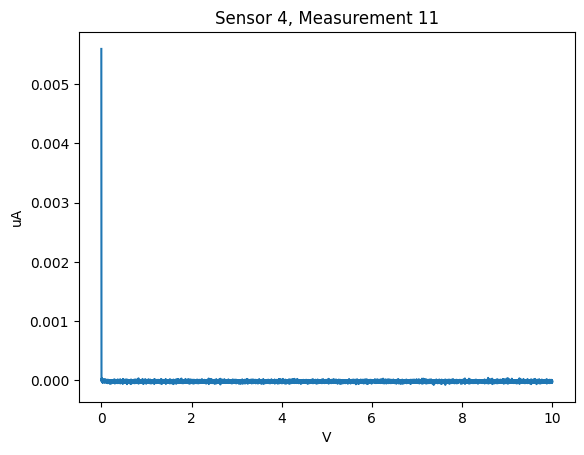

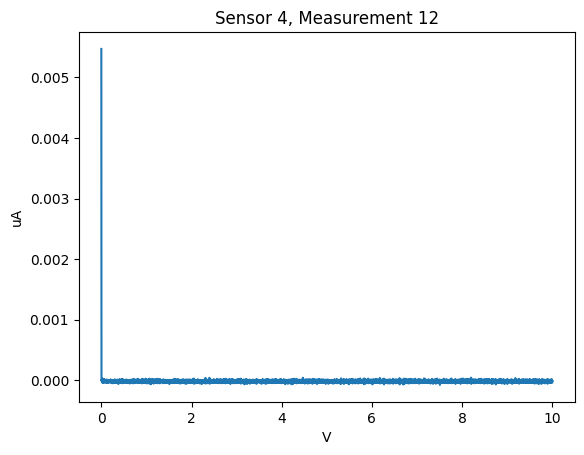

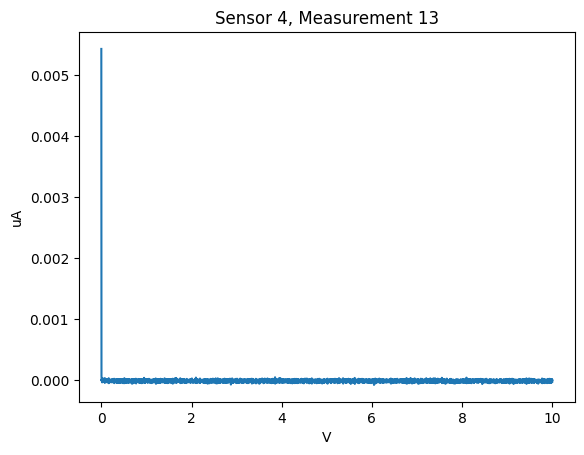

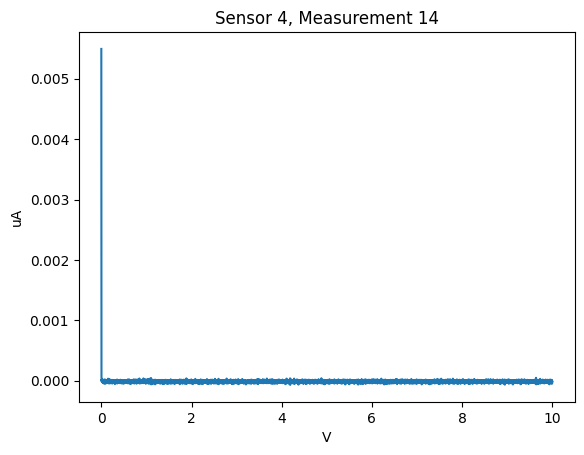

SENSOR 5:


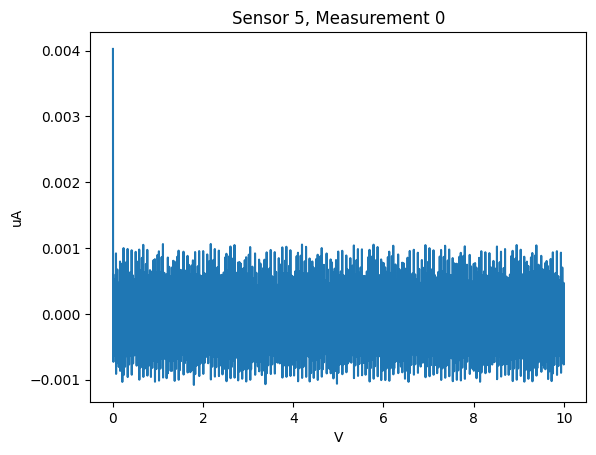

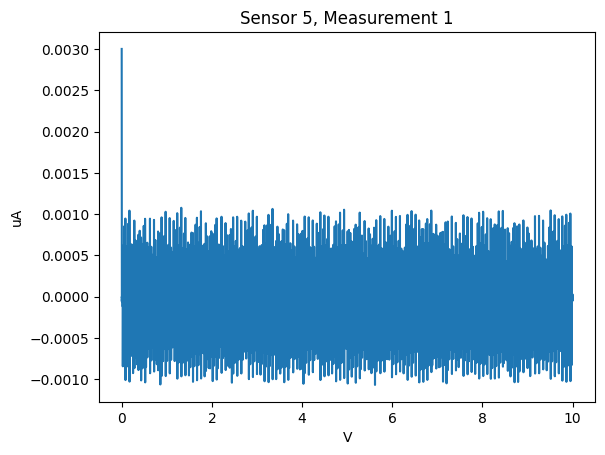

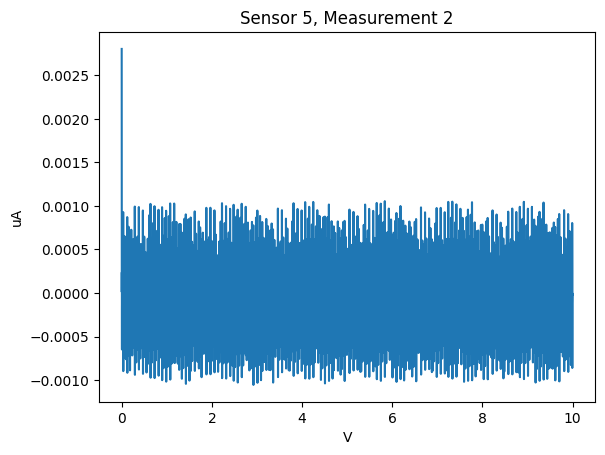

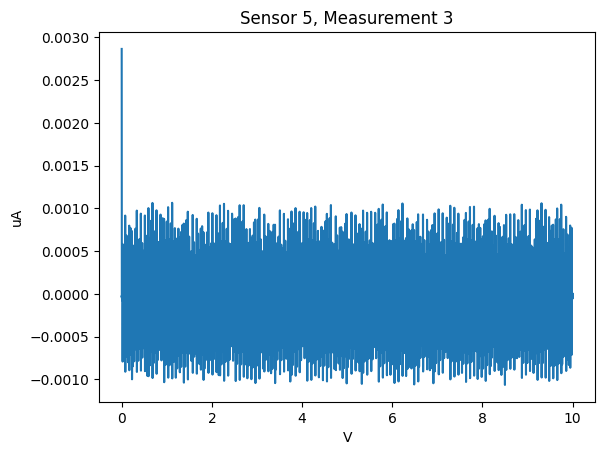

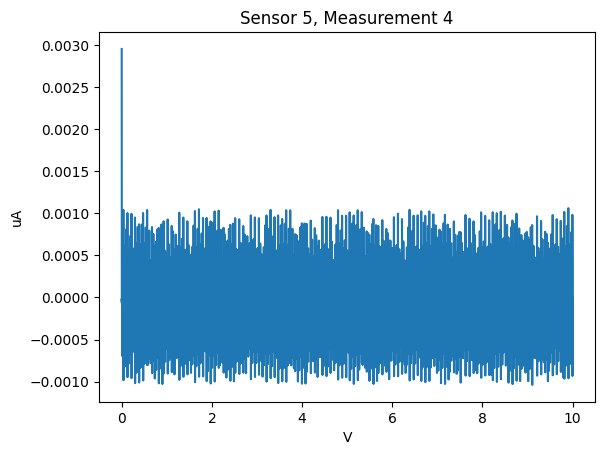

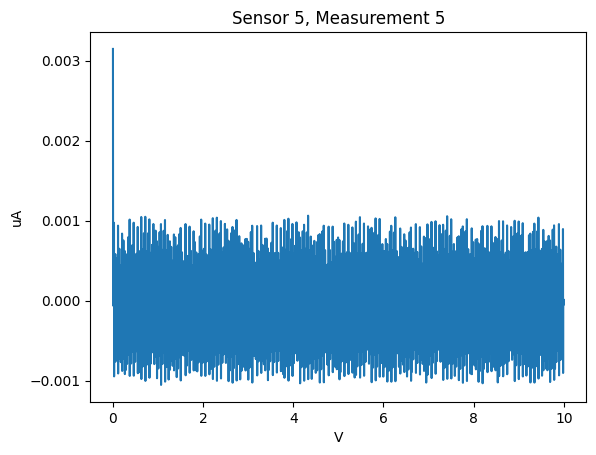

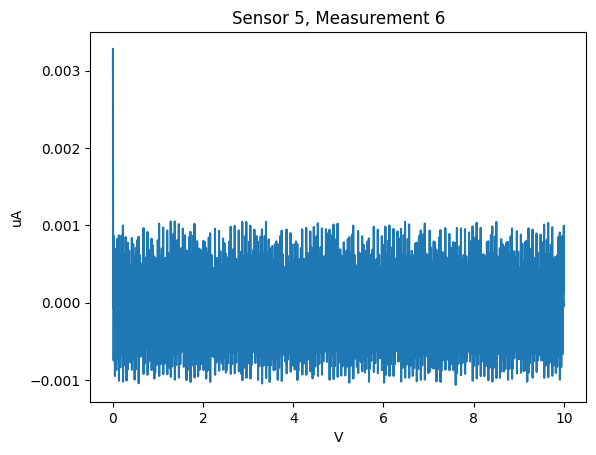

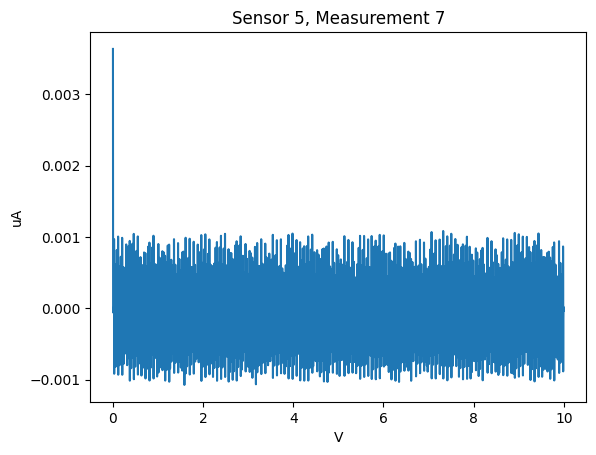

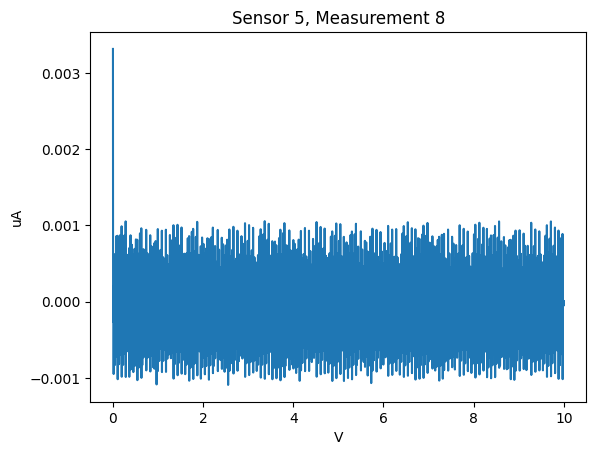

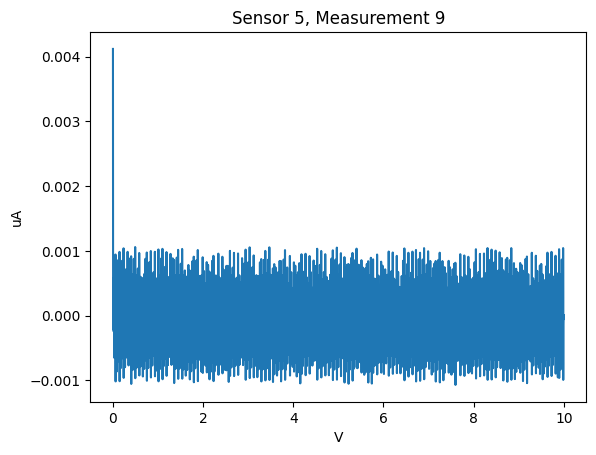

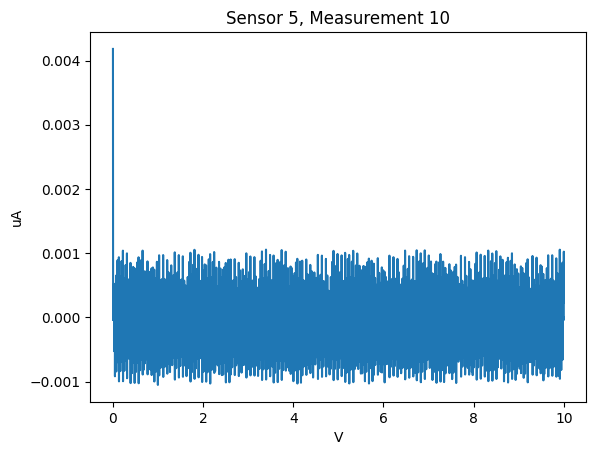

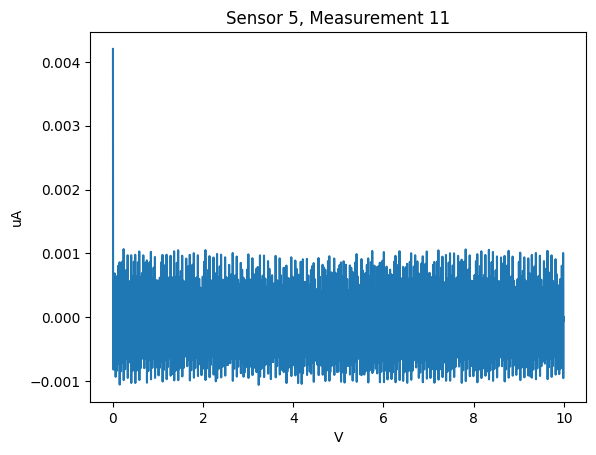

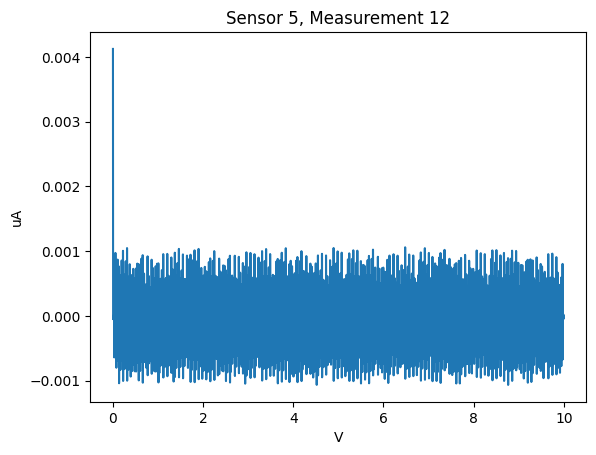

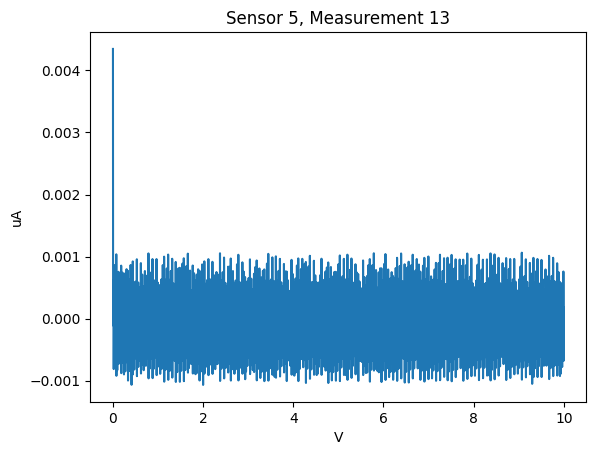

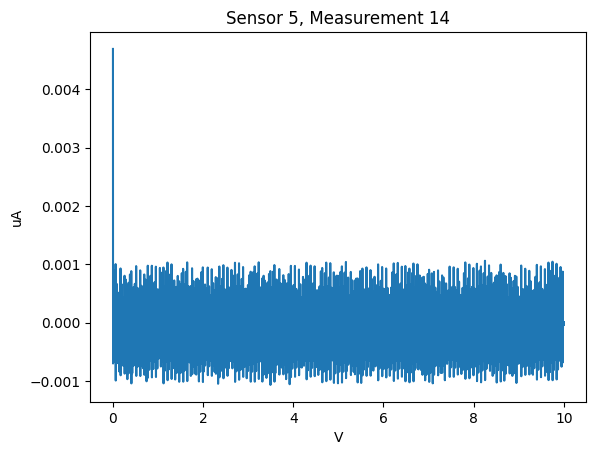

SENSOR 6:


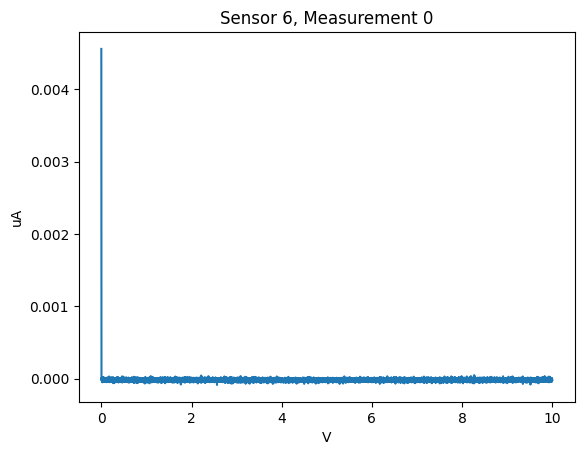

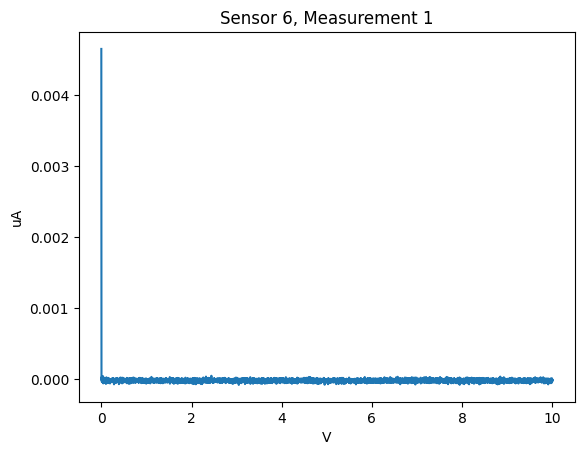

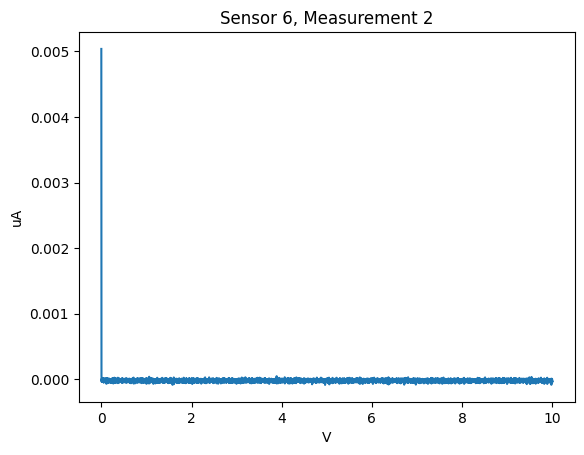

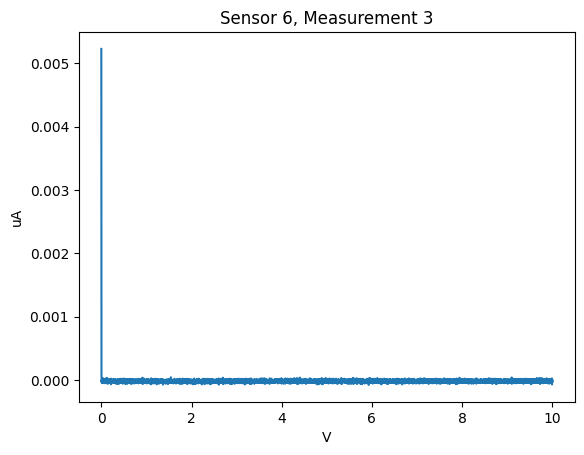

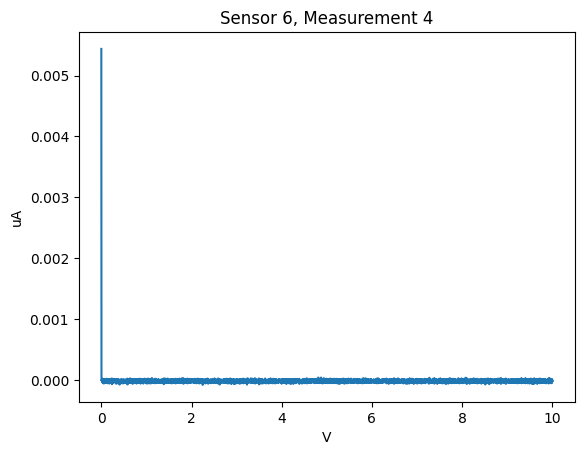

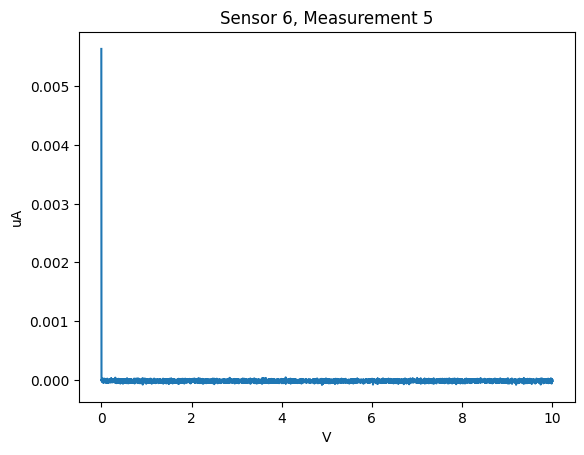

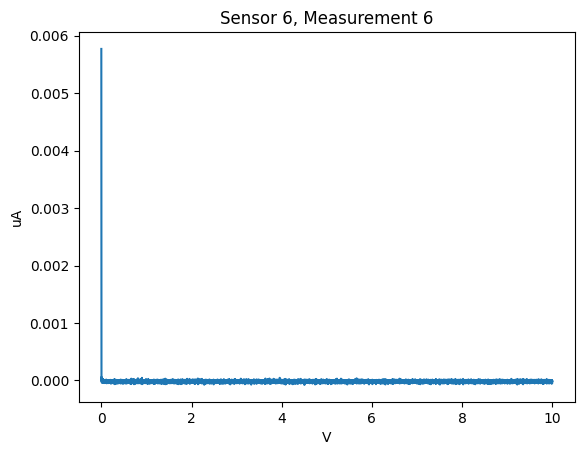

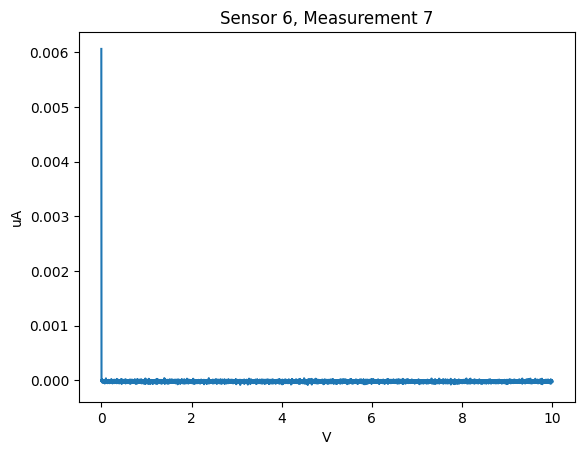

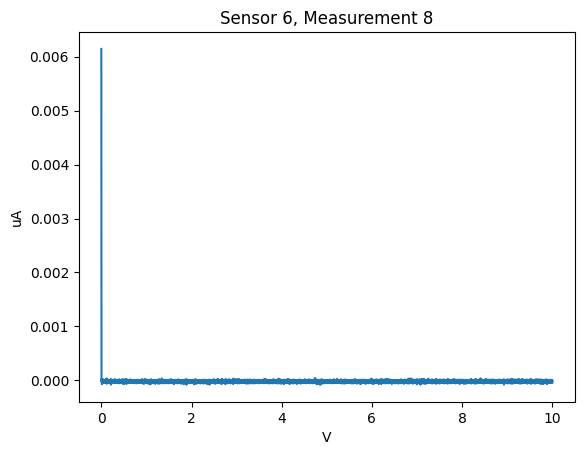

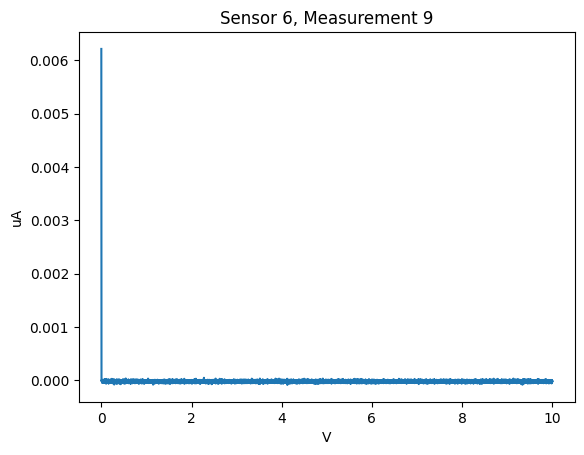

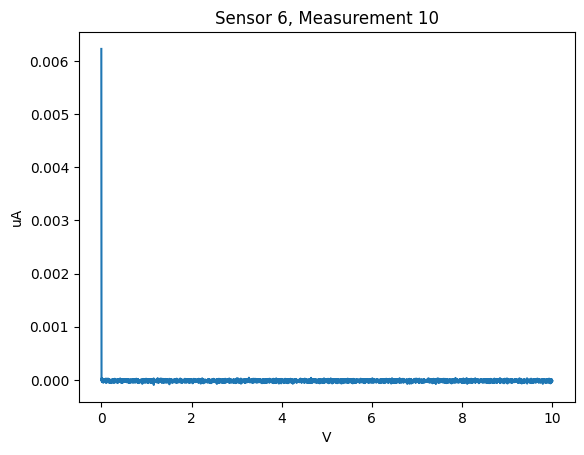

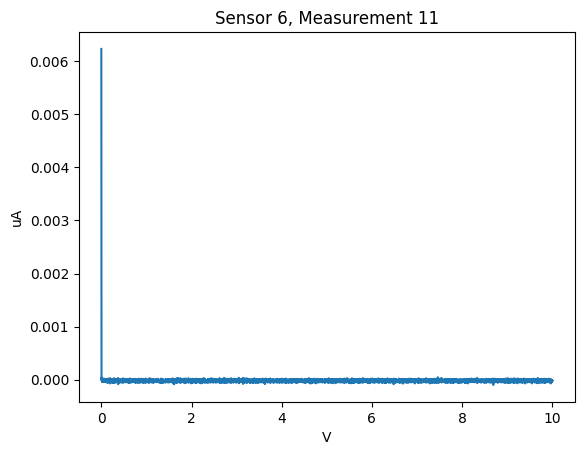

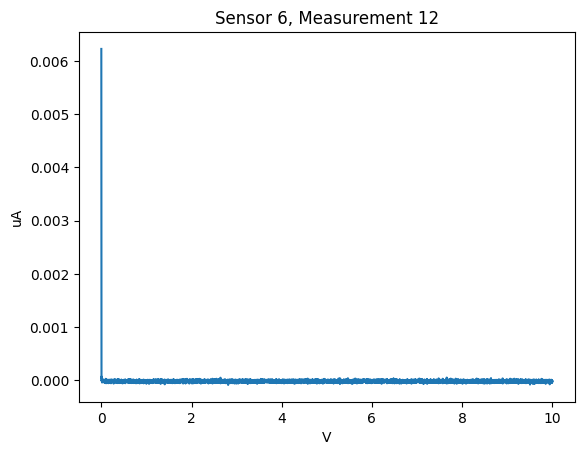

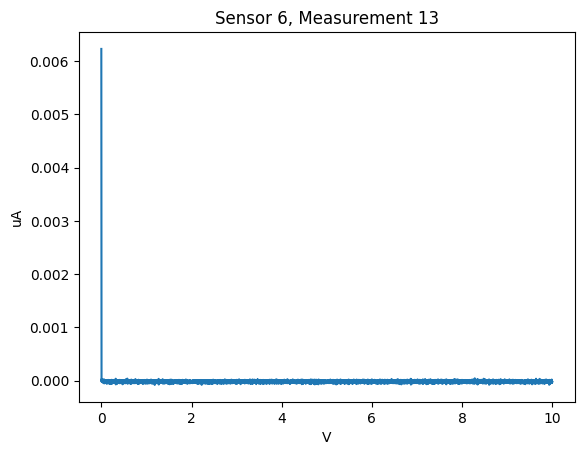

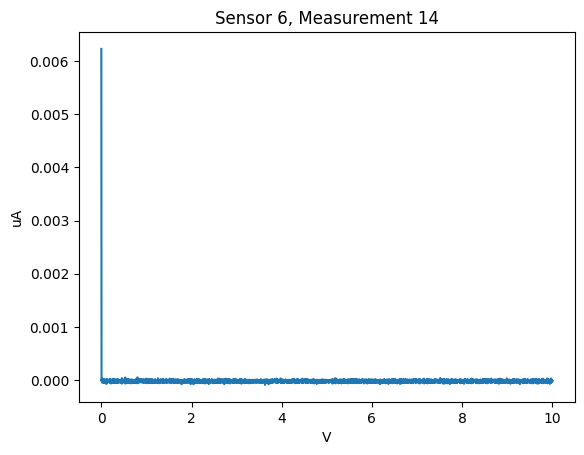

SENSOR 7:


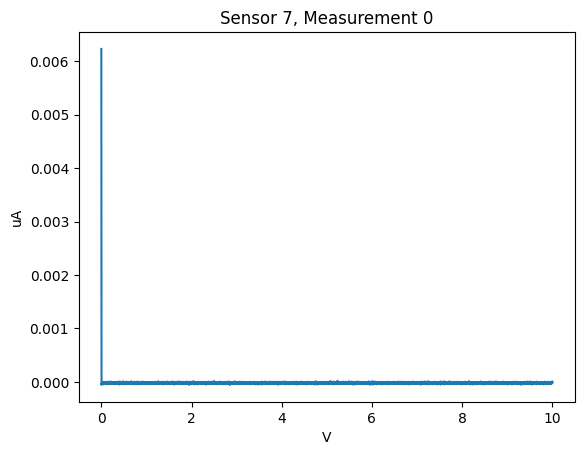

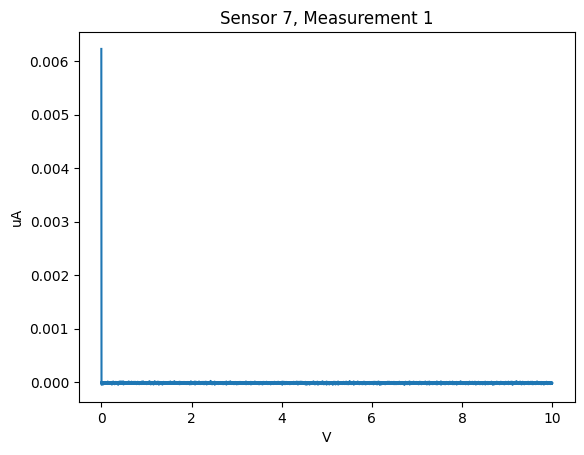

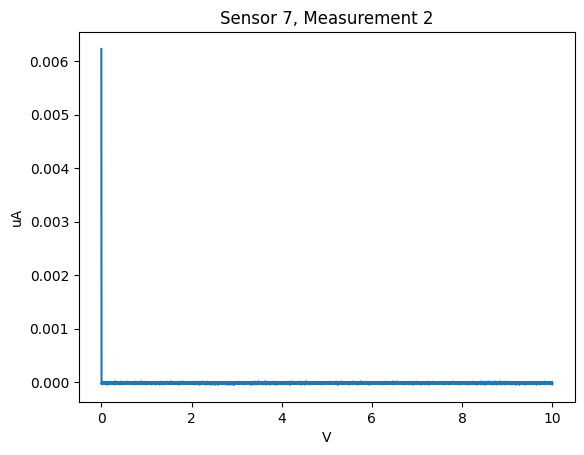

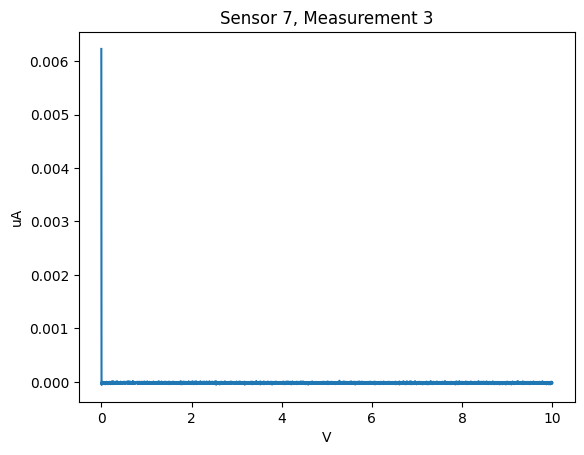

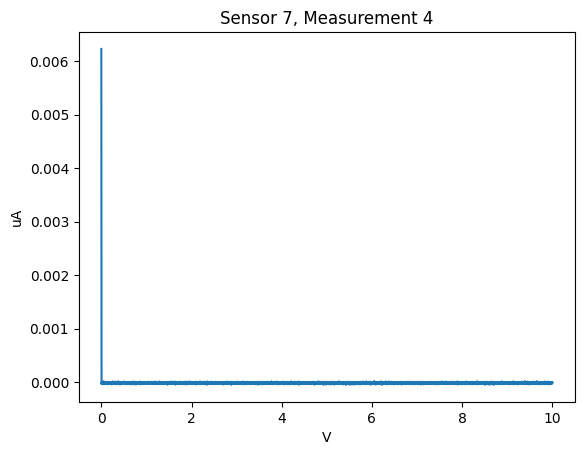

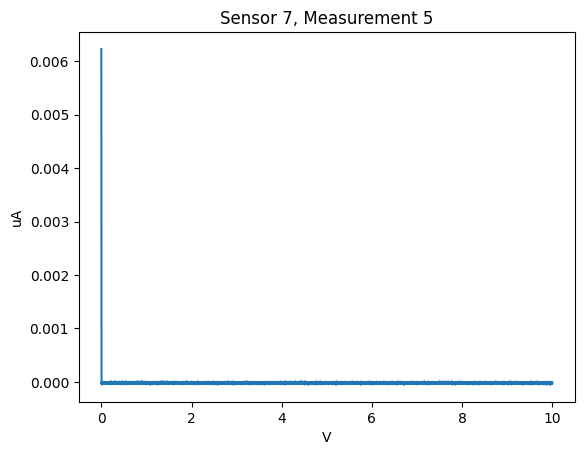

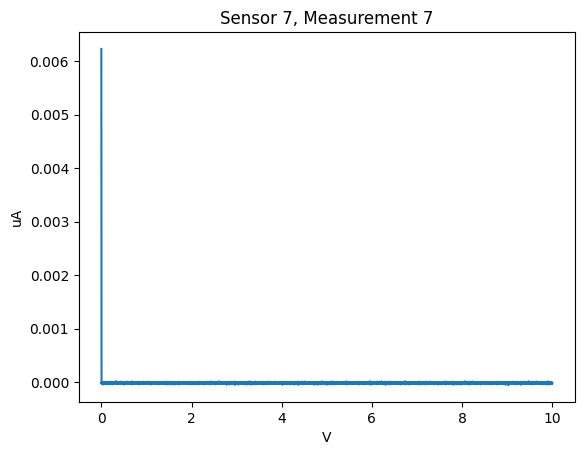

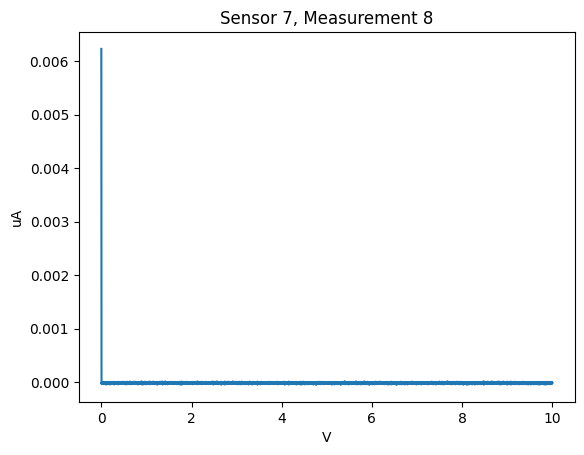

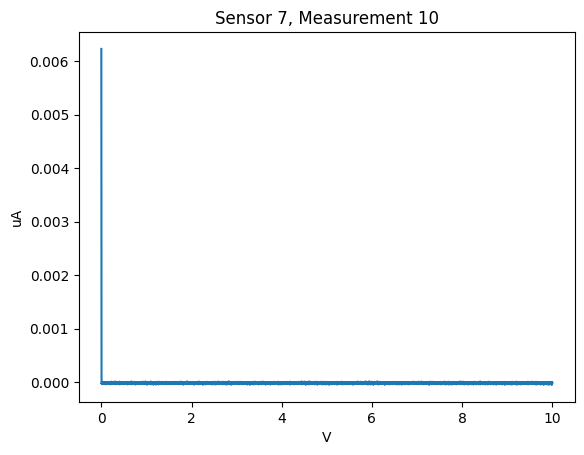

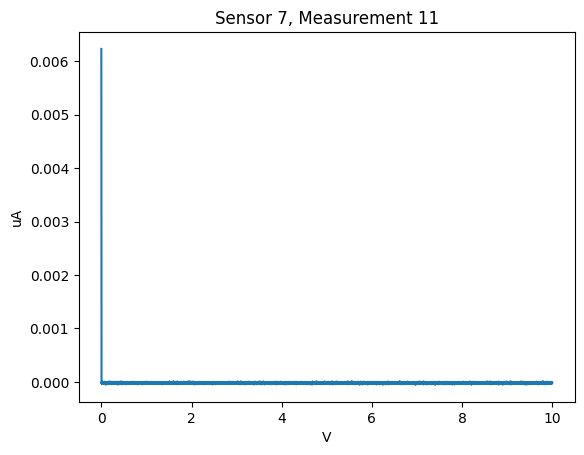

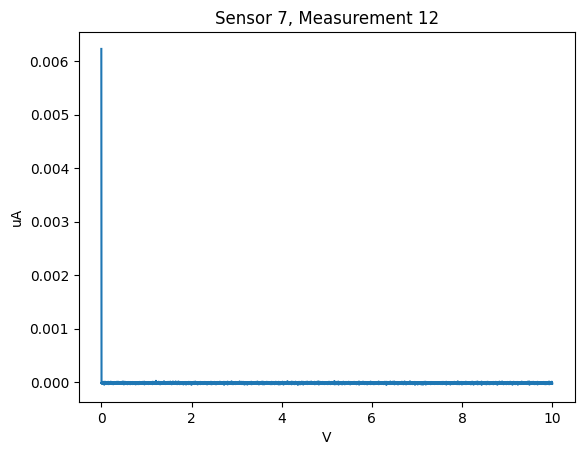

In [4]:
#Now let's plot graphs for each sensor!
import matplotlib.pyplot as plt

for i in range(8):
    print(f"SENSOR {i}:")
    for j in range(15):
        plt.figure()  # Create a new figure for each plot
        plt.plot(sensor_dataframes[i][j]['V'], sensor_dataframes[i][j]['uA'])
        plt.title(f"Sensor {i}, Measurement {j}")
        plt.xlabel("V")
        plt.ylabel("uA")
        plt.show()  # Show the plot separately

We see from the plots that:
- sensor 3 exhibits slightly different behavior in the first 4 measurements than the others (negative current as voltage goes to 0)
- **sensor 5 behaves rather erratically, with much higher noise than the others.**

The second observation is much more significant!

## 1.2. Quantitative Noise Analysis

I begin a more formal analysis by computing two numerical features of each sensor:
- the **standard deviation** of the current;
- the **signal-to-noise ratio (SNR)**.

In [13]:
noise_std_list = []
mean_std_devs = []
for i in range(8):
    noise_std_list.append([])
    for j in range(15):
        noise_std_list[i].append(sensor_dataframes[i][j]["uA"].std())
    mean_std_devs.append(sum(noise_std_list[i])/len(noise_std_list[i]))

for i in range(8):
    print(f"Standard deviations for each measurement of Channel {i}:")
    print(noise_std_list[i])
    print("------")
    print(f"Mean standard deviation for measurements of Channel {i}:")
    print(mean_std_devs[i])
    print("------------------------\n")

Standard deviations for each measurement of Channel 0:
[np.float64(6.0661683050507886e-05), np.float64(5.97262407861011e-05), np.float64(5.9834638681079733e-05), np.float64(5.9782719872650013e-05), np.float64(5.992781036771401e-05), np.float64(5.991211545127525e-05), np.float64(5.991431366103678e-05), np.float64(5.9976068711452506e-05), np.float64(6.00305591530402e-05), np.float64(6.000098310278691e-05), np.float64(6.0068400859712125e-05), np.float64(6.0157543761117676e-05), np.float64(5.999671363724947e-05), np.float64(6.0116096141261996e-05), np.float64(6.005122743711337e-05)]
------
Mean standard deviation for measurements of Channel 0:
6.0010474311606596e-05
------------------------

Standard deviations for each measurement of Channel 1:
[np.float64(6.721083490452937e-05), np.float64(6.64778639077193e-05), np.float64(6.656005664278142e-05), np.float64(6.67460139144929e-05), np.float64(6.685127129890364e-05), np.float64(6.695721074317754e-05), np.float64(6.70294990452915e-05), np.fl

NB: the measurements of each channel are **quite stable** - even the corrupted one (no. 5).

In [12]:
#Next, I compute the SNR for each measurement:
snr_measurement = []
avg_snr = []
for i in range(8):
    snr_measurement.append([])
    for j in range(15):
        snr_measurement[i].append(sensor_dataframes[i][j]['uA'].mean()/sensor_dataframes[i][j]['uA'].std())
    avg_snr.append(pd.Series(snr_measurement[i]).mean())

for i in range(8):
    print(f"SNRs for each measurement of Channel {i}:")
    print(snr_measurement[i])
    print("------")
    print(f"Average SNR of Channel {i}:")
    print(sum(snr_measurement[i])/len(snr_measurement[i]))
    print("------------------------\n")

SNRs for each measurement of Channel 0:
[np.float64(-0.5129824930413417), np.float64(-0.46644908678755265), np.float64(-0.45916548596772105), np.float64(-0.4503513425576062), np.float64(-0.44753280323820943), np.float64(-0.4411090130222359), np.float64(-0.4516710866413913), np.float64(-0.4306474835242989), np.float64(-0.44285133936939564), np.float64(-0.4292142989636932), np.float64(-0.43904276003229303), np.float64(-0.4315132601620847), np.float64(-0.4335110568464003), np.float64(-0.4284333786353007), np.float64(-0.430878347035961)]
------
Average SNR of Channel 0:
-0.4463568823883657
------------------------

SNRs for each measurement of Channel 1:
[np.float64(-0.2848833645009187), np.float64(-0.2832654006610307), np.float64(-0.2776194420426682), np.float64(-0.26935162571434895), np.float64(-0.2742393969302495), np.float64(-0.2664517094695515), np.float64(-0.2666866611836738), np.float64(-0.26449130305807833), np.float64(-0.2622132303186625), np.float64(-0.2645754568829271), np.float

The noise outweighs the signal in each of the channels. Note that channel 3 has a slightly smaller amplitude than the rest, and a similar mean current, so its (absolute) SNR is a bit higher.

## 1.3. Outlier Detection & Corruption Confirmation

Here I compute the *$Z$-score of the mean standard deviations* to prove that channel 5 is indeed an outlier.

The **$Z$-score** of a datapoint is computed as follows: $$Z = \frac{X - \mu}{\sigma},$$where $X$ is the value at the datapoint, $\mu$ is the mean value of the points, and $\sigma$ is their standard deviation.

If the aboslute value of the $Z$-score of a point is greater than $3$, that point is considered an extreme outlier.

In [14]:
z_scores = []
mu = sum(mean_std_devs)/len(mean_std_devs)
sigma = pd.Series(mean_std_devs).std()

for i in range(8):
    z_scores.append((mean_std_devs[i] - mu)/sigma)
    print(f"Z-score for Channel {i}: {z_scores[i]}")

Z-score for Channel 0: -0.2686315853515176
Z-score for Channel 1: -0.09416823501845865
Z-score for Channel 2: -0.30872145587874905
Z-score for Channel 3: -0.5082016214897713
Z-score for Channel 4: -0.4318632201626067
Z-score for Channel 5: 2.4530258218817083
Z-score for Channel 6: -0.48211886662075915
Z-score for Channel 7: -0.35932083735984566


While it's not over 3, the Z-score of Channel 5 is significantly higher than the others! This proves that Channel 5 is a serious outlier.

## 1.4. Searching for Periodic Patterns Using FFT

Now I apply a Fast Fourier Transform (FFT) to check for periodicity in the noise. Recall that the **Discrete Fourier Transform (DFT)** of a sequence of numbers $x_0, \dots, x_{N-1}$ is the sequence $X_0, \dots, X_{N-1},$ where $$X_k = \sum_{n=0}^{N-1} x_n \cdot e^{-2\pi i \frac{k}{N}n}.$$

### 1.4.1. Theoretical Detour for the Interested
For $N$ a power of two (which can be achieved by padding the sequence by zeros - this does not change the DFT), we can reduce the complexity of computing the DFT from $O(N^2)$ to $O(N\log{N})$ by noting the following:

$$
\begin{align}
X_k &= \sum_{n=0}^{N-1} x_n e^{-\frac{2\pi i}{N} nk} \\
&= \sum_{m=0}^{\frac{N}{2}-1}x_{2m} e^{-\frac{2\pi i}{N/2} \cdot (mk)} + e^{-\frac{2\pi i}{N}k} \sum_{m=0}^{\frac{N}{2}-1} x_{2m+1} e^{-\frac{2\pi i}{N/2} \cdot (mk)} \\
&= E_k + e^{-\frac{2 \pi i}{N}k} O_k,
\end{align}
$$
where $k = 0, \dots, \frac{N}{2} - 1$. $E_k$ and $O_k$ are the DFT coefficients of the sequences consisting only of *even* and *odd* elements of our original sequence, respectively.

Intuitively, when we plot the DFT, the $x$-axis represents frequency, while the $y$-axis represents the amplitude at that frequency. The simplest example is if we only get one non-zero value of the DFT; that says that our function is periodic.

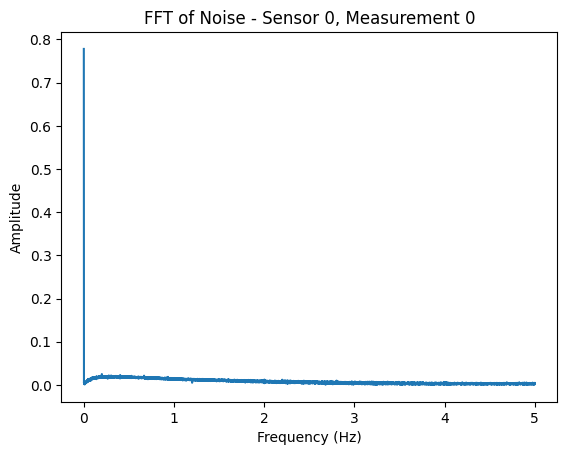

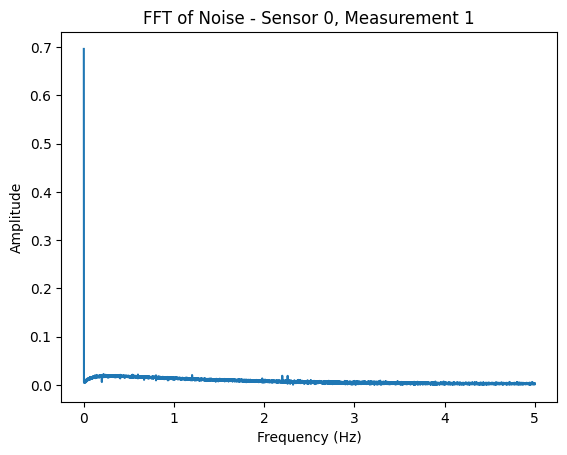

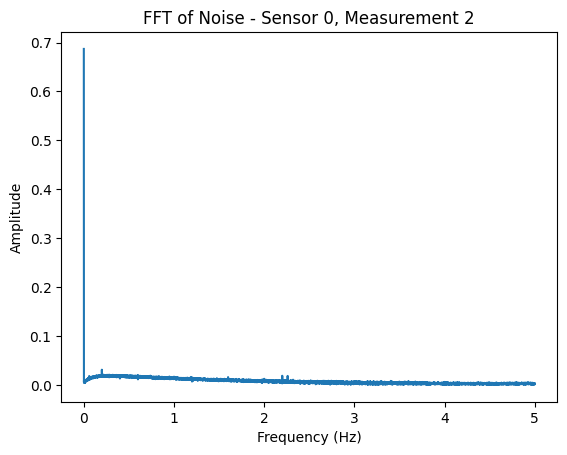

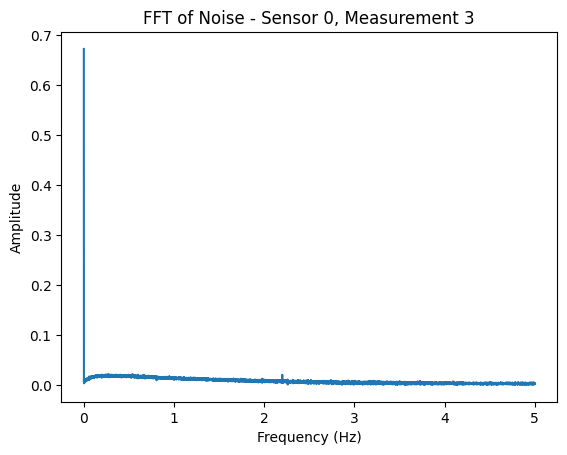

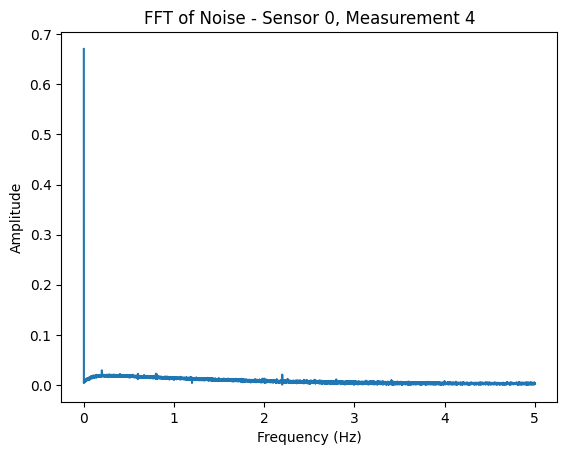

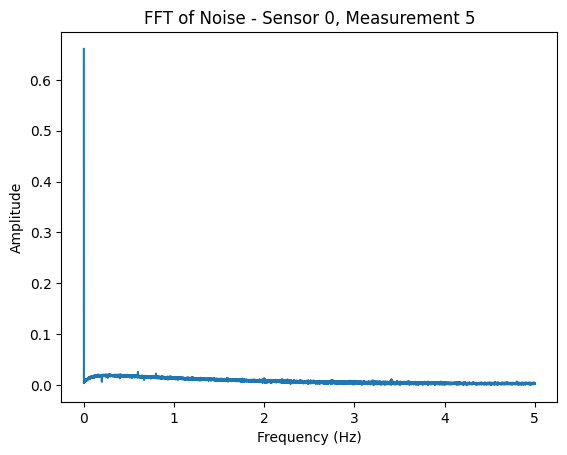

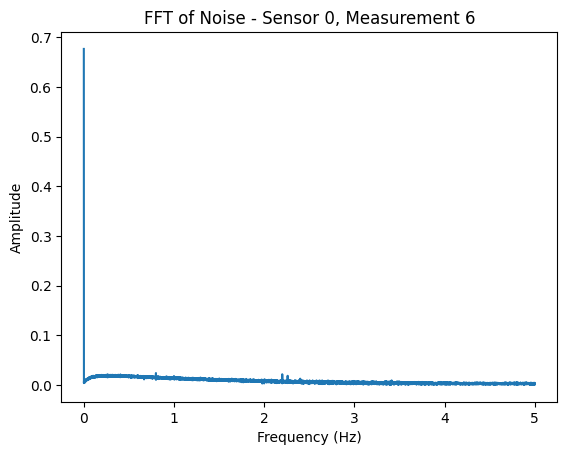

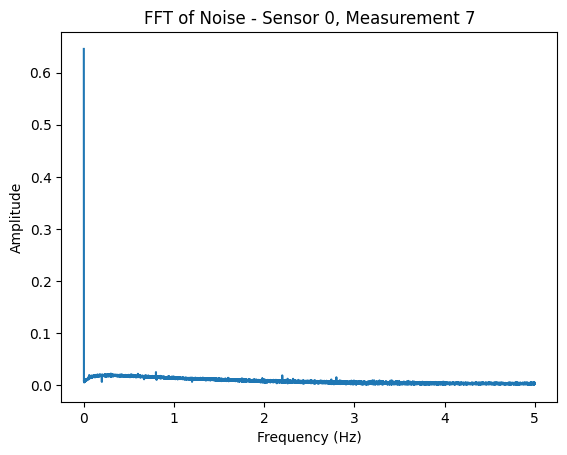

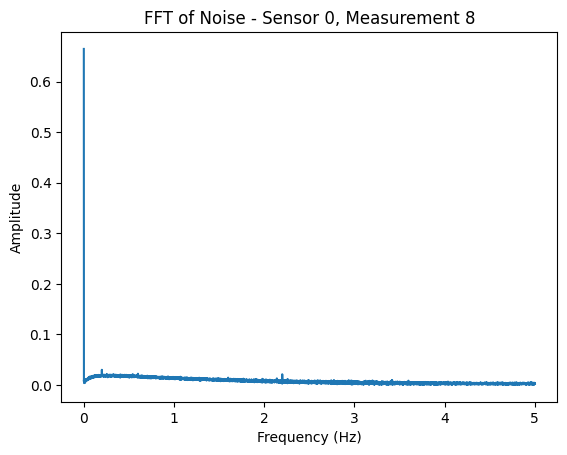

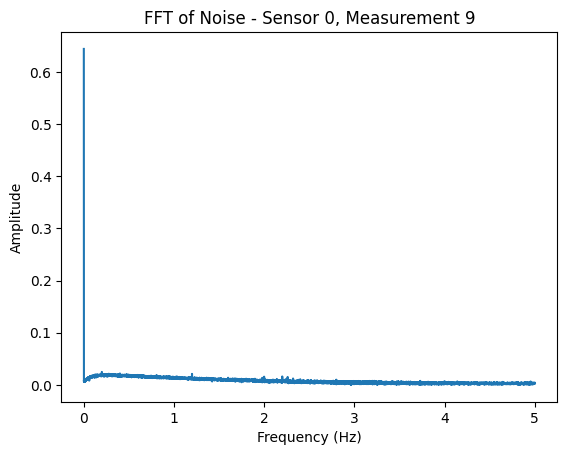

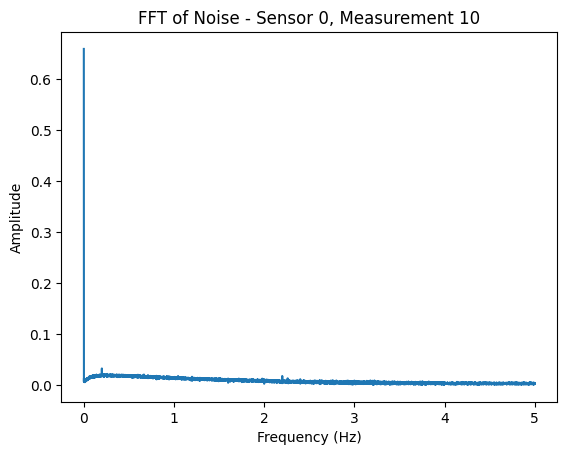

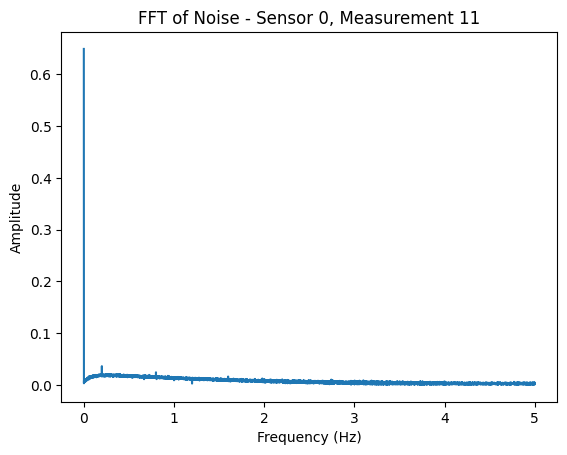

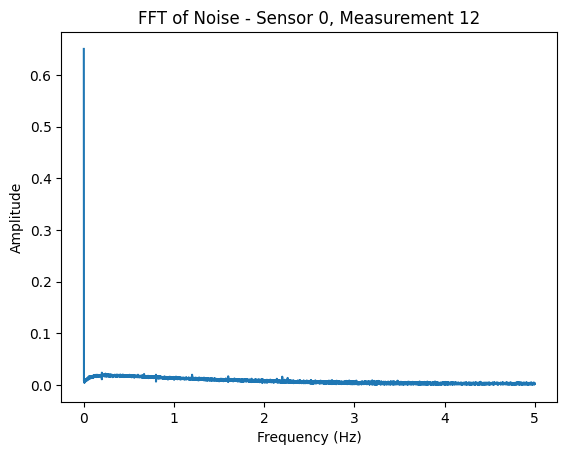

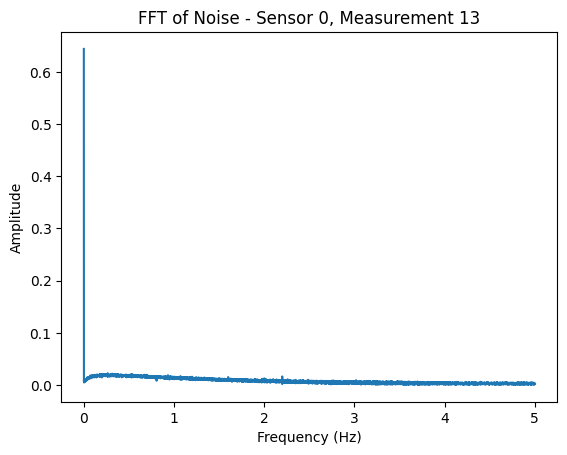

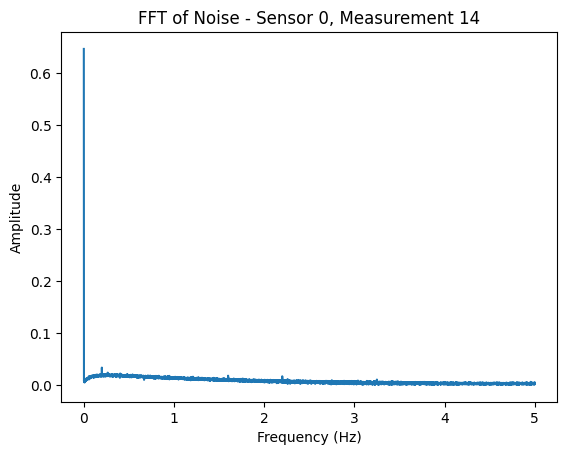

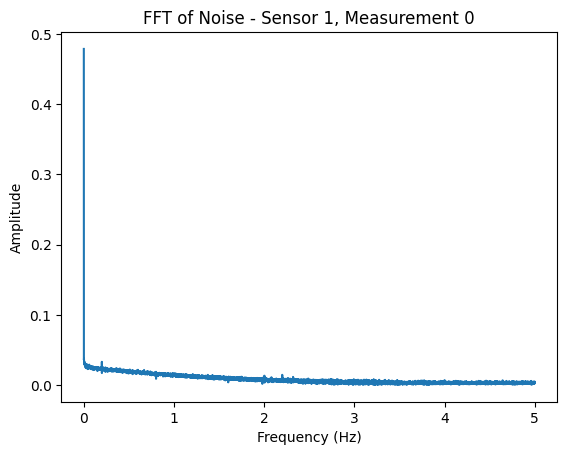

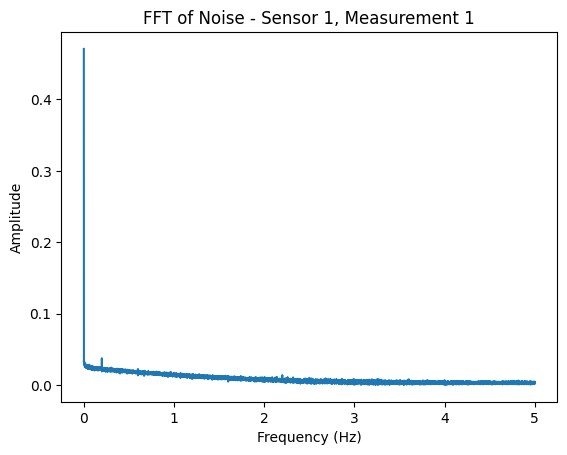

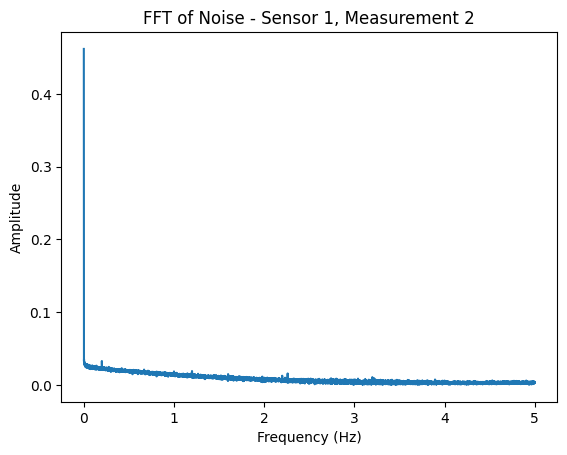

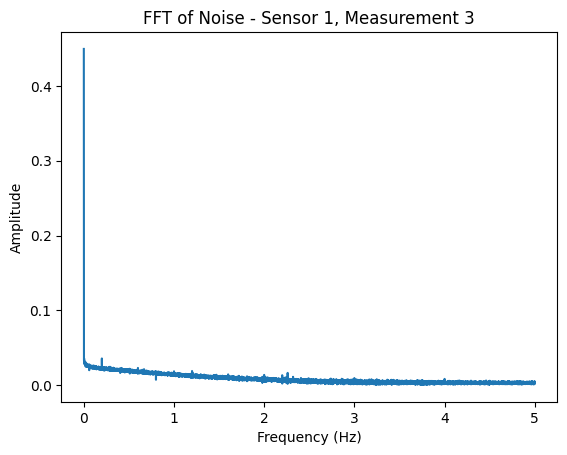

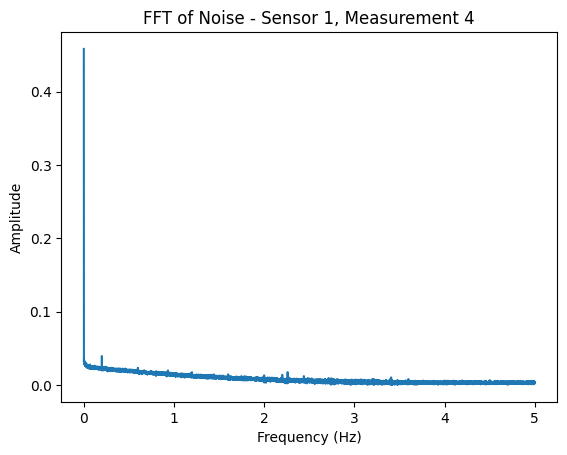

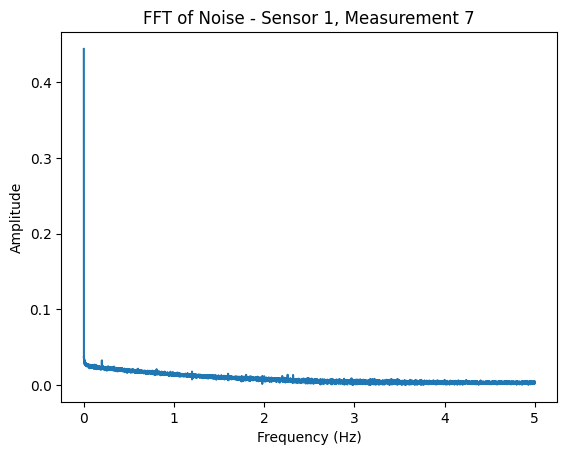

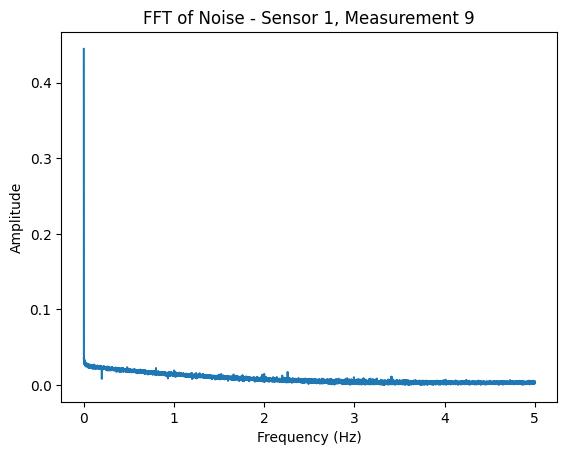

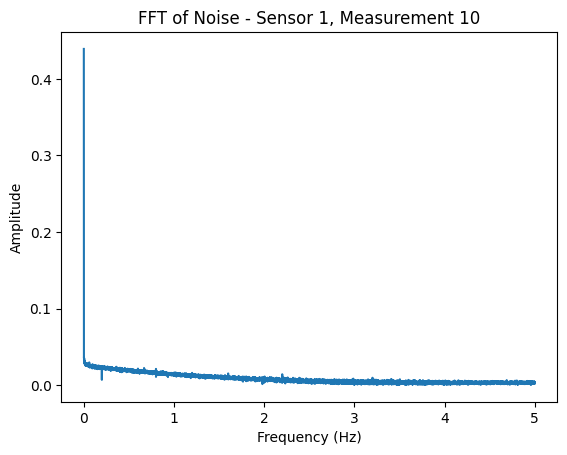

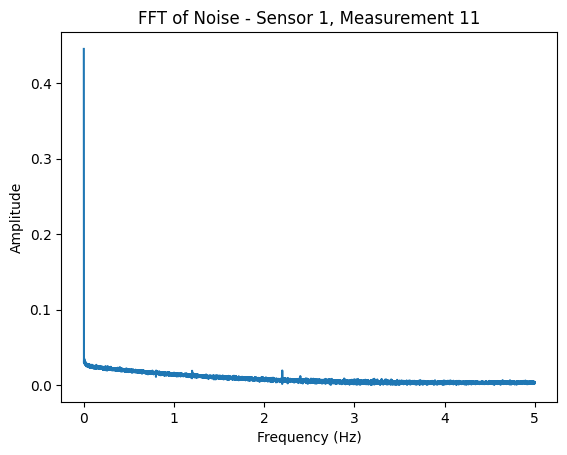

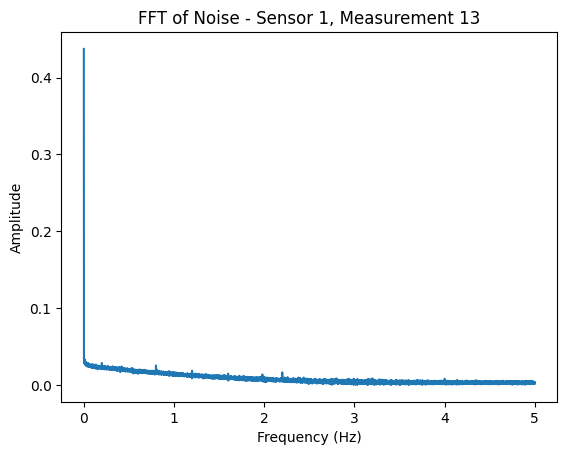

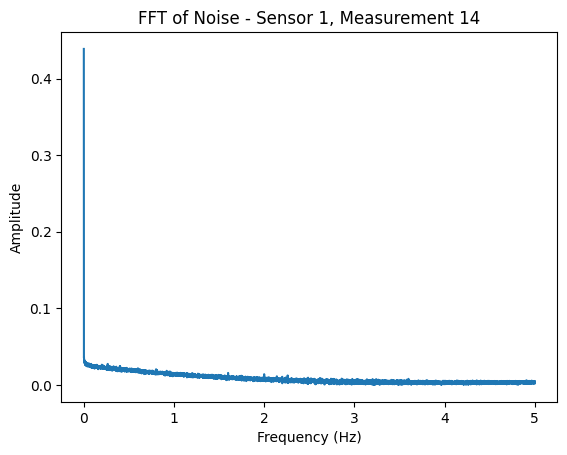

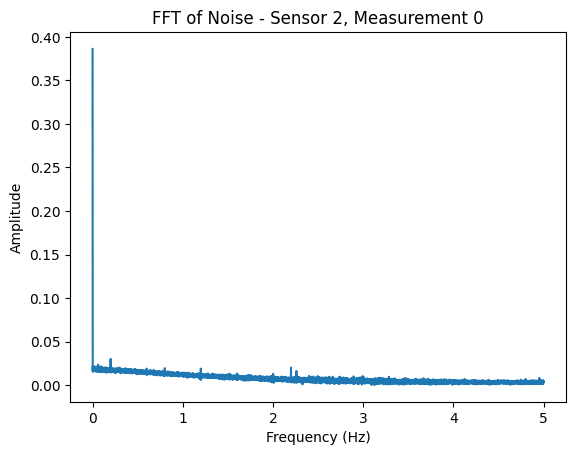

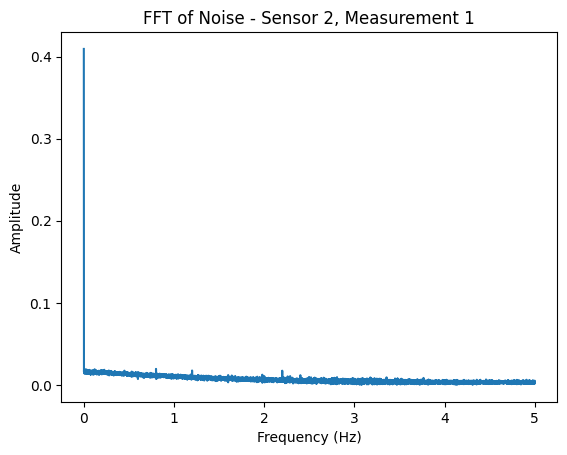

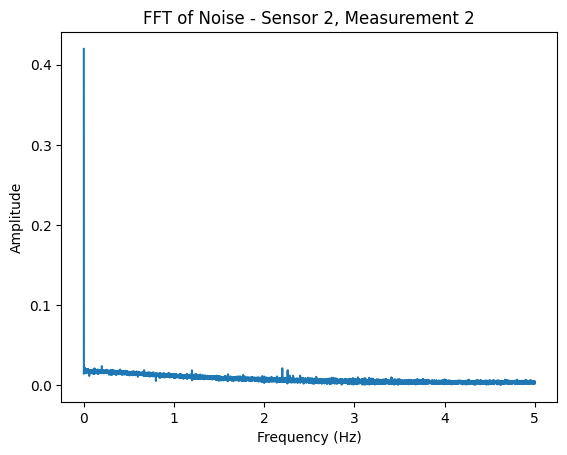

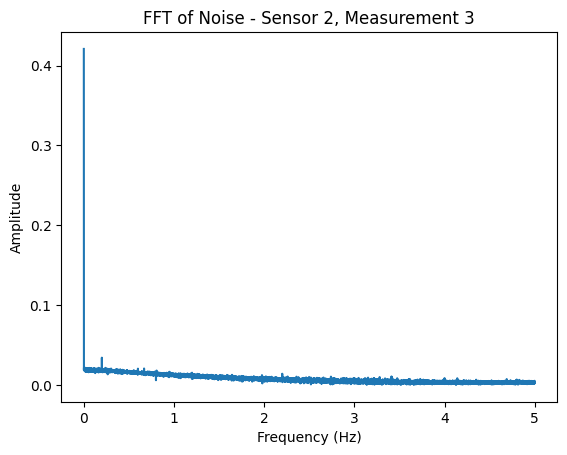

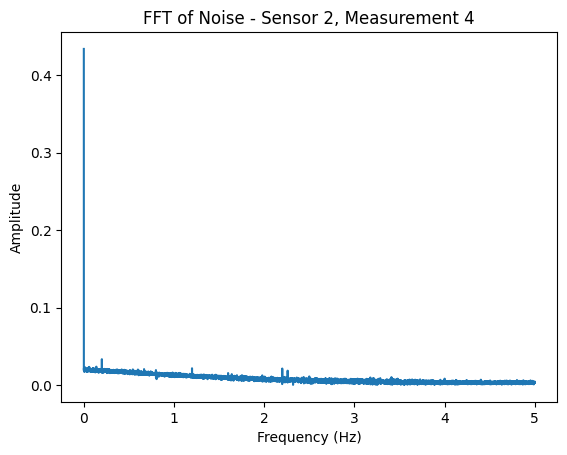

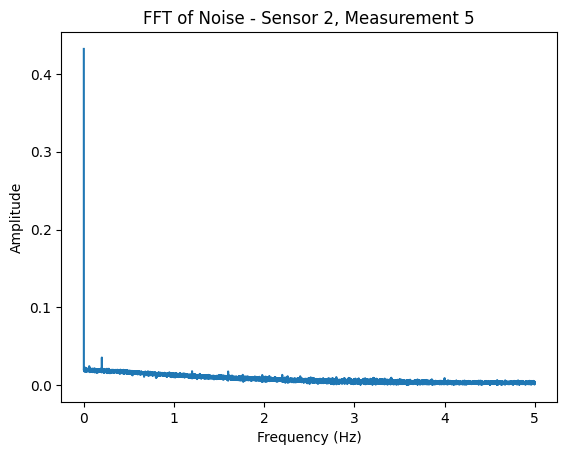

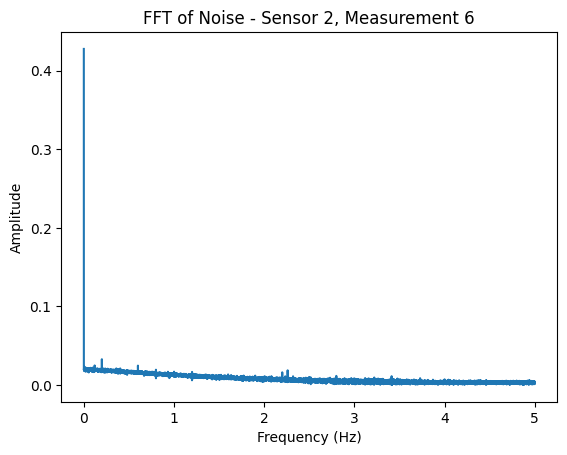

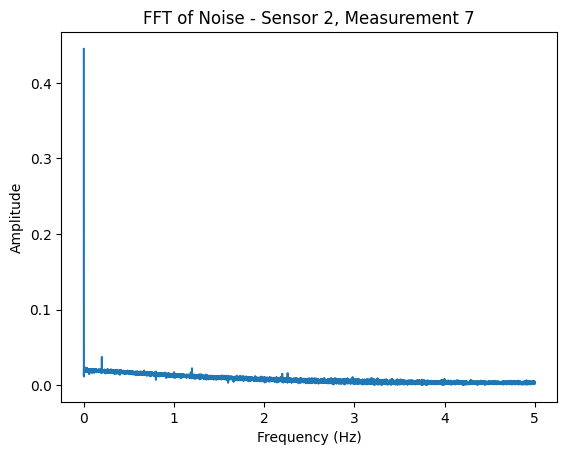

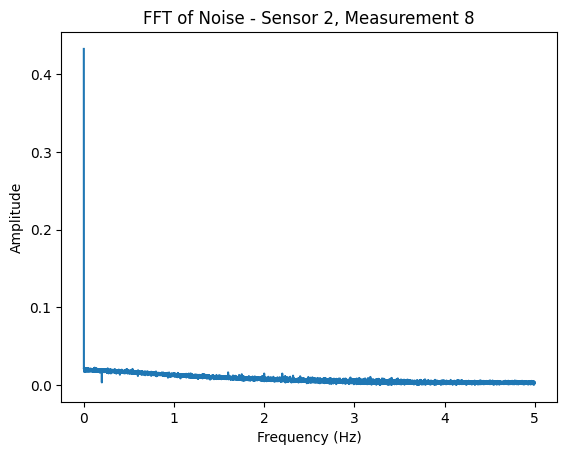

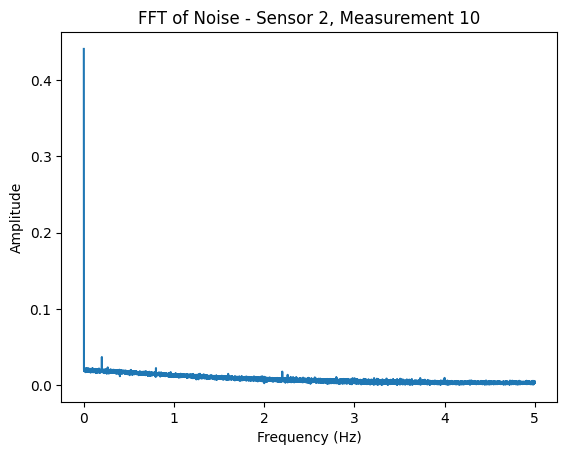

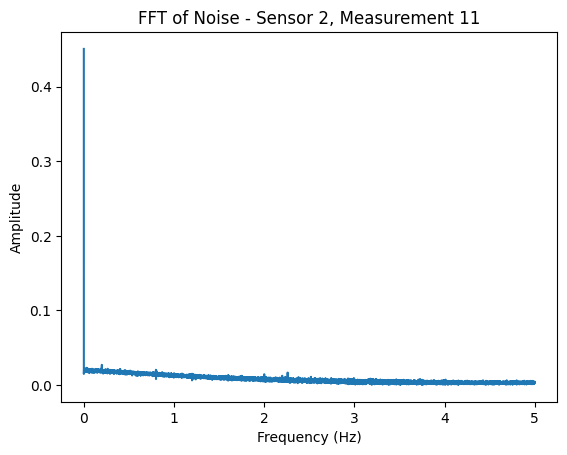

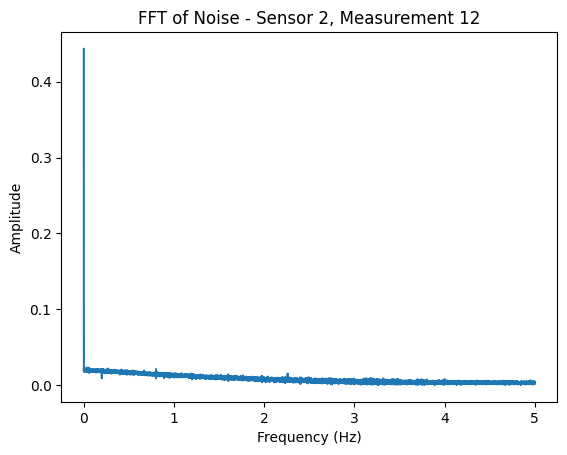

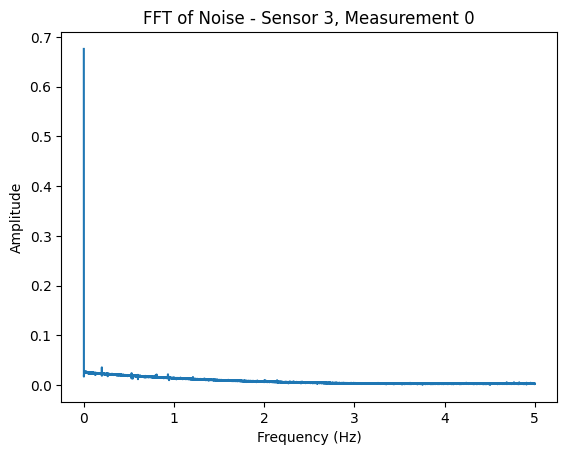

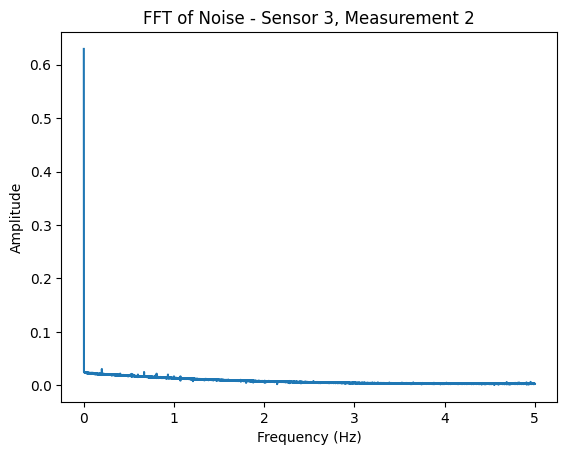

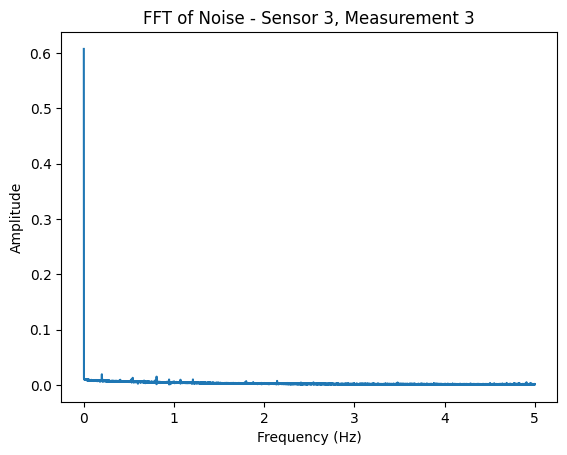

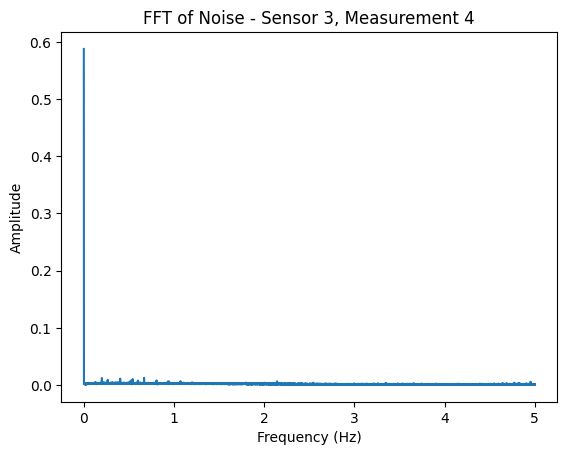

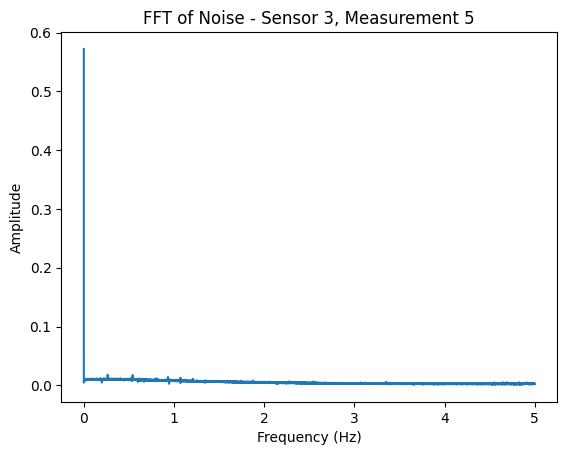

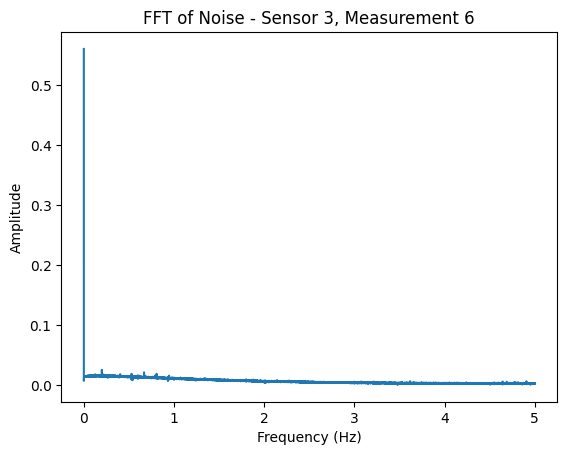

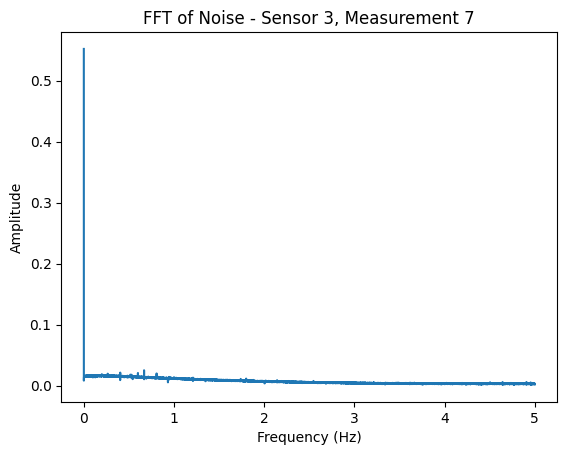

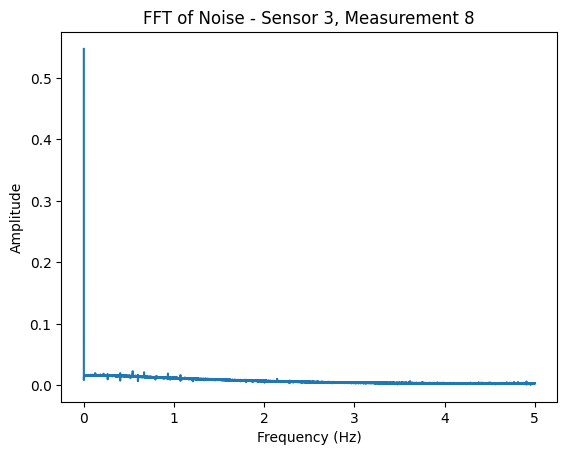

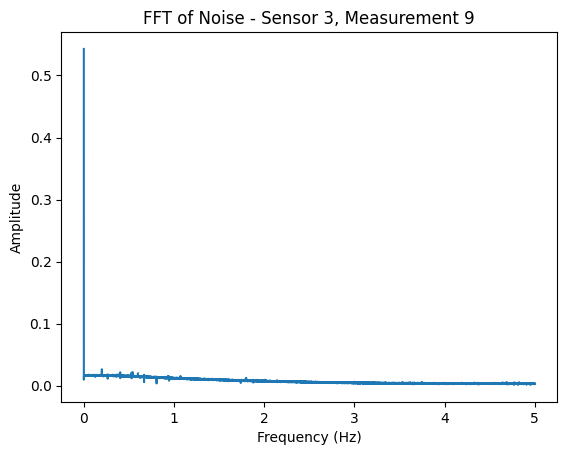

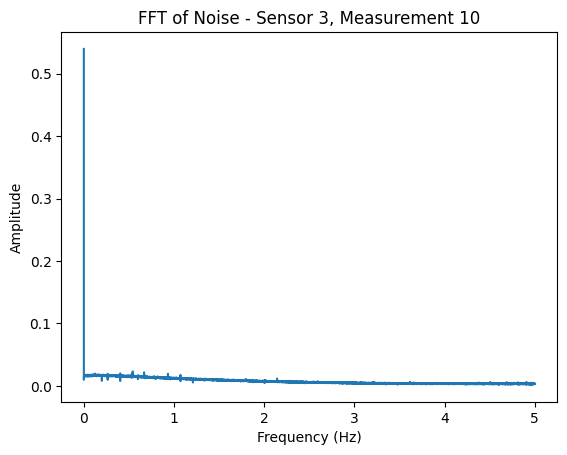

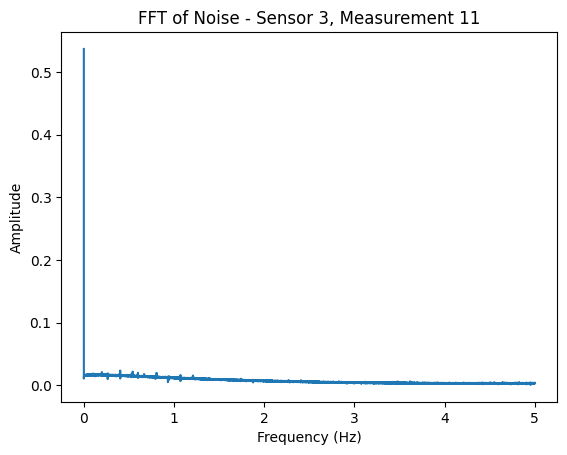

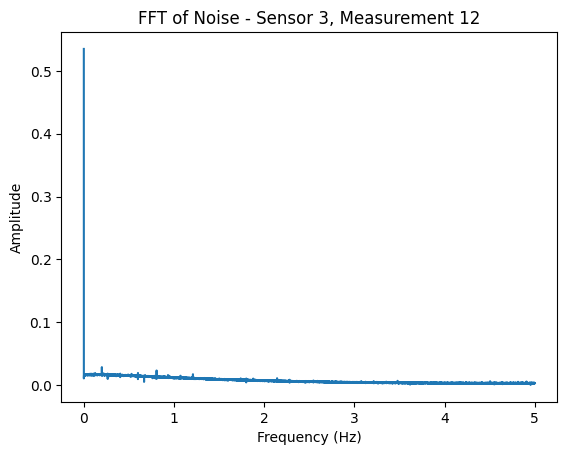

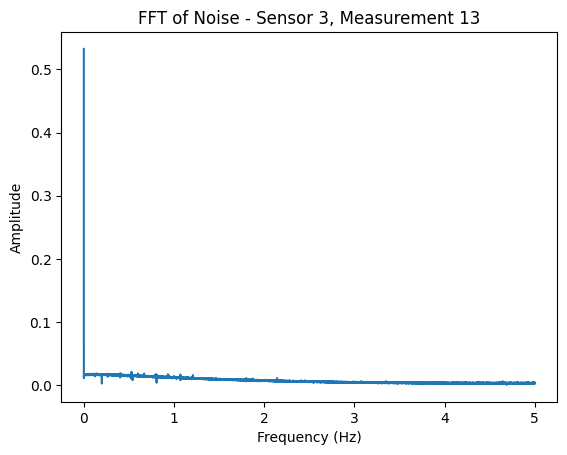

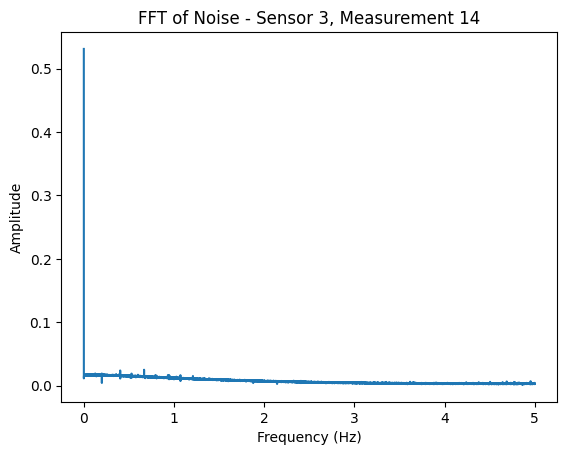

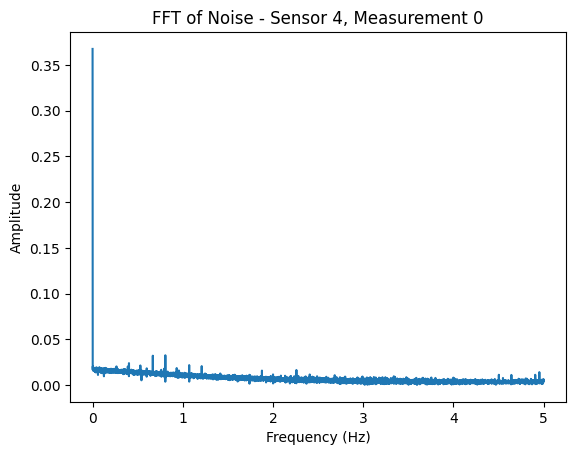

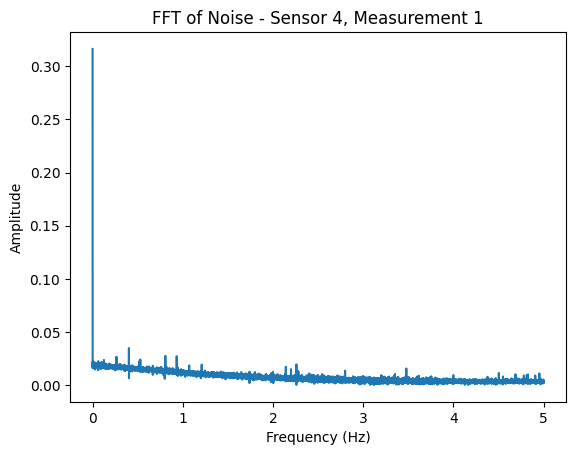

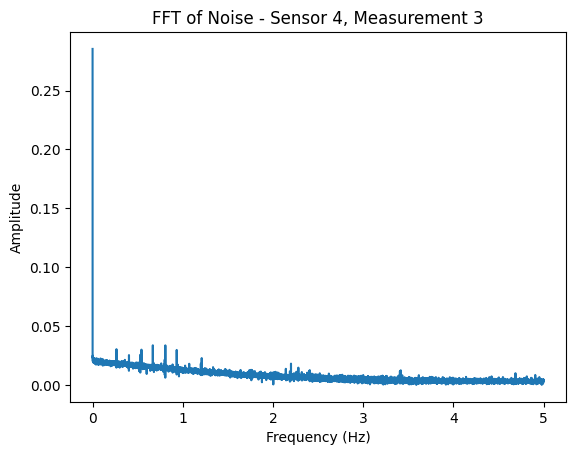

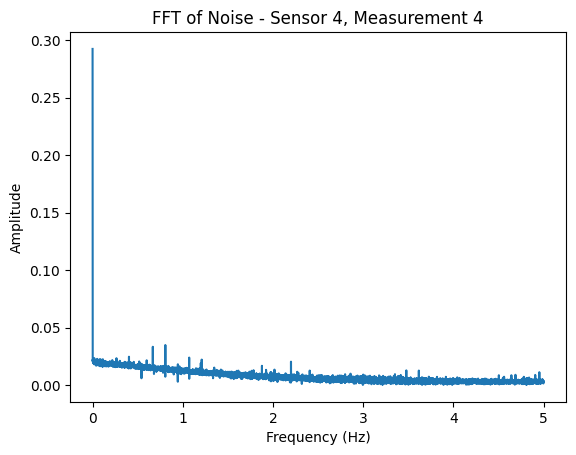

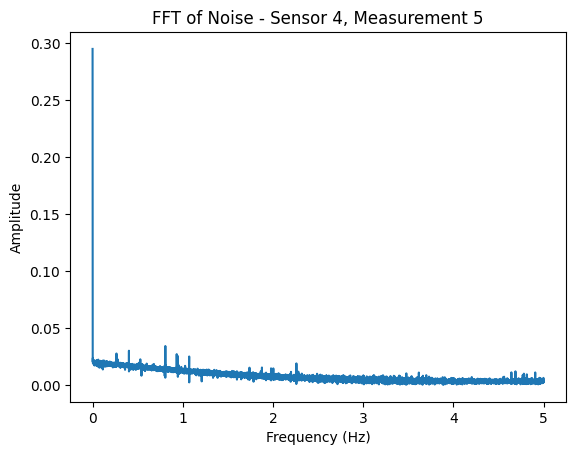

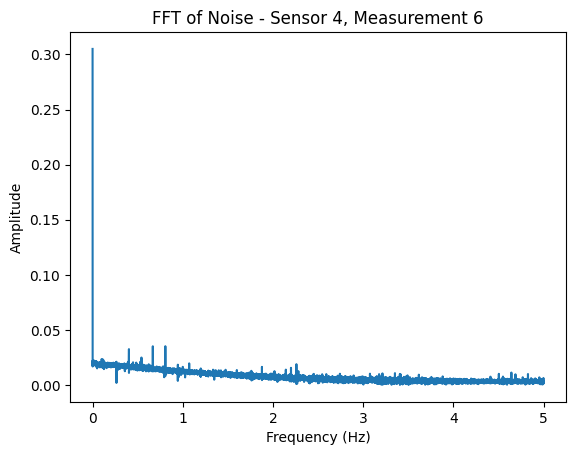

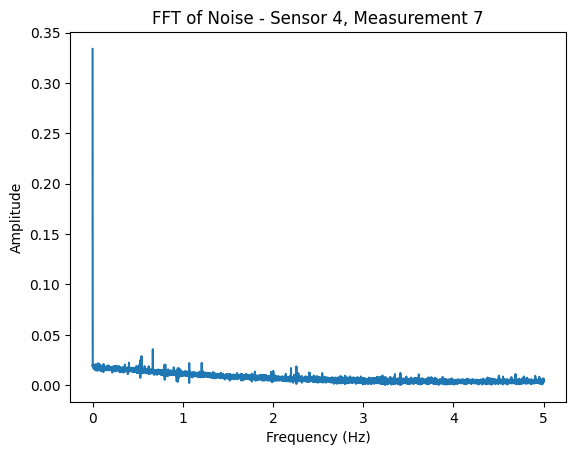

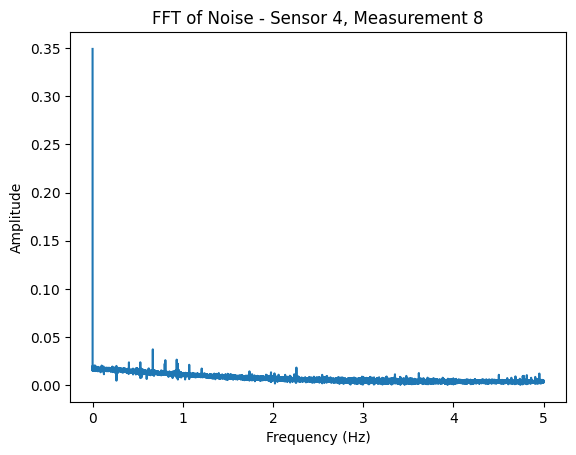

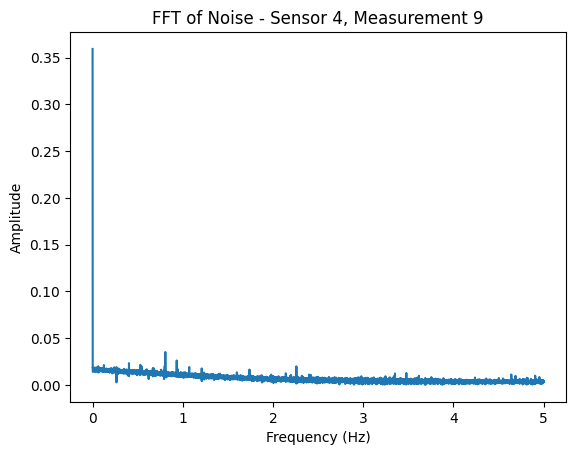

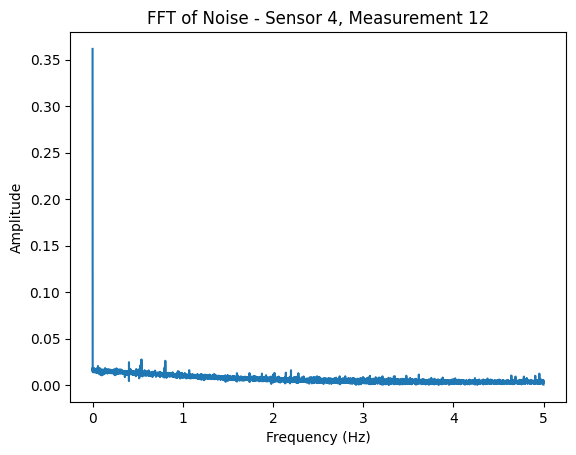

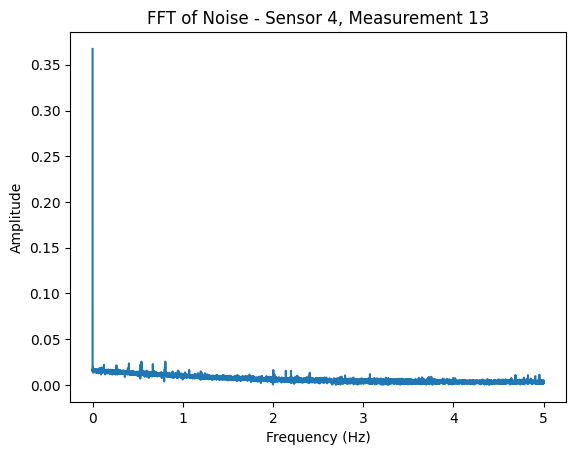

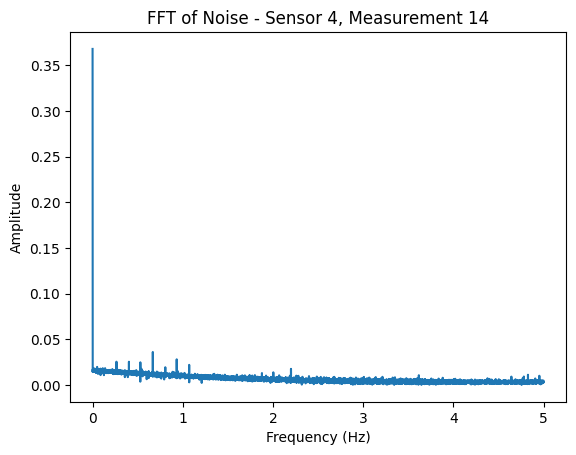

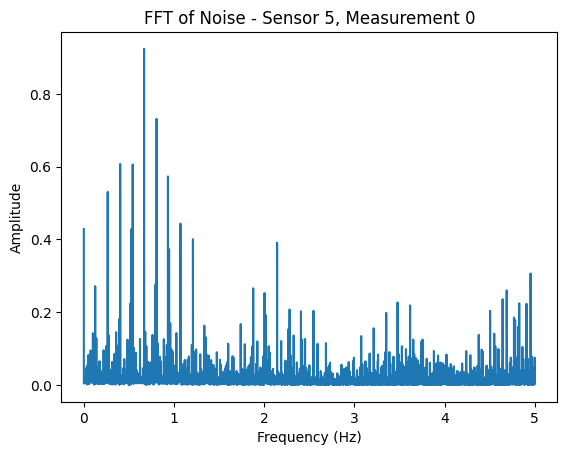

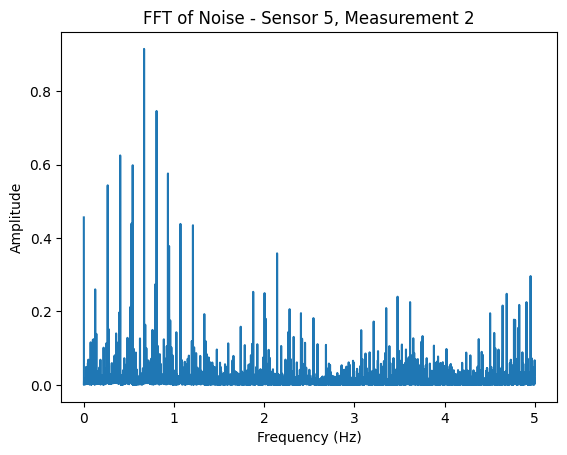

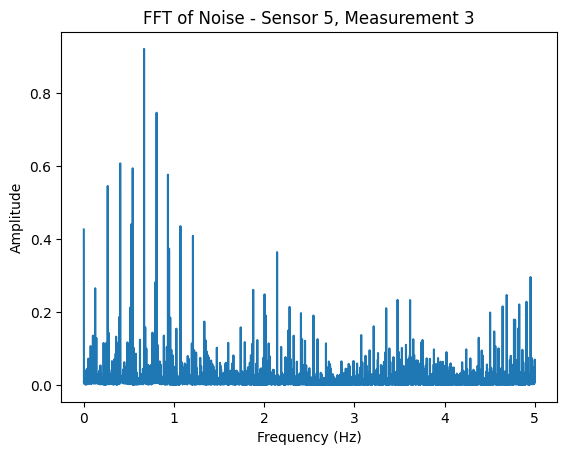

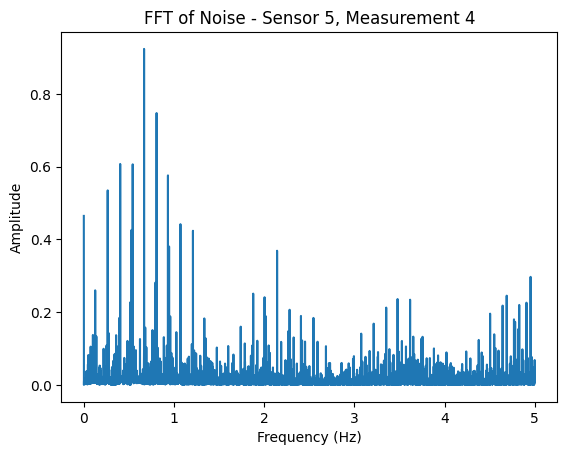

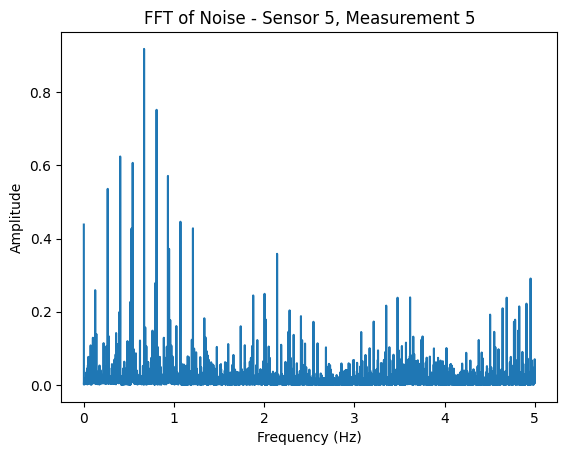

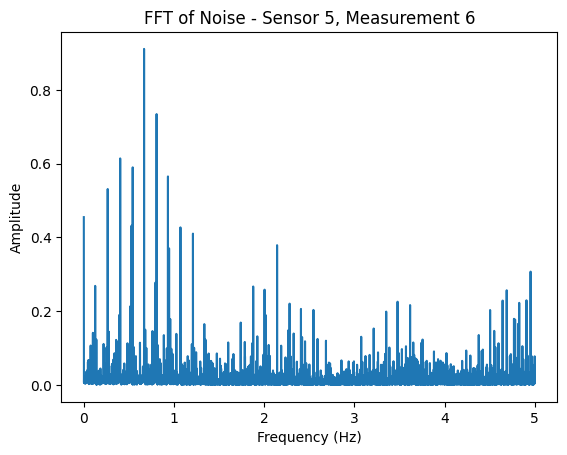

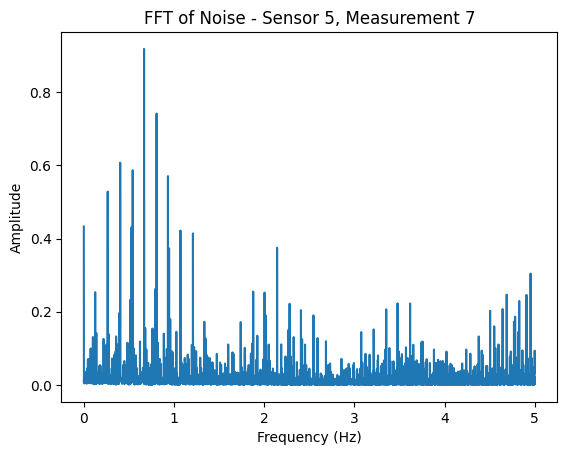

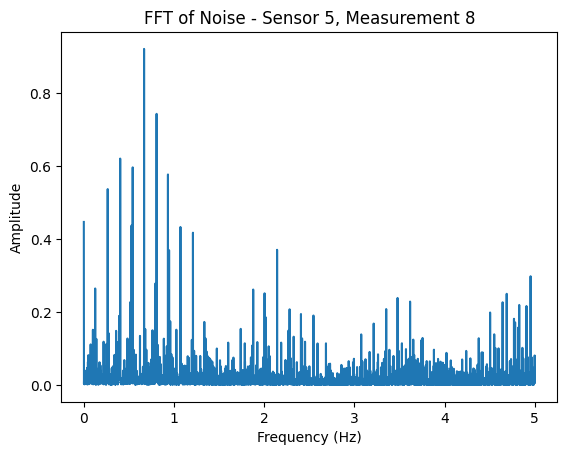

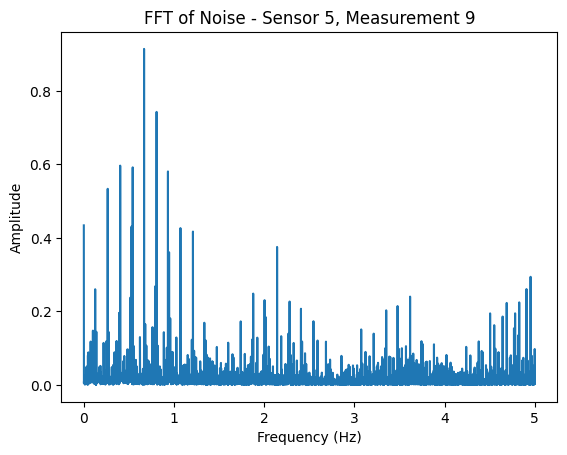

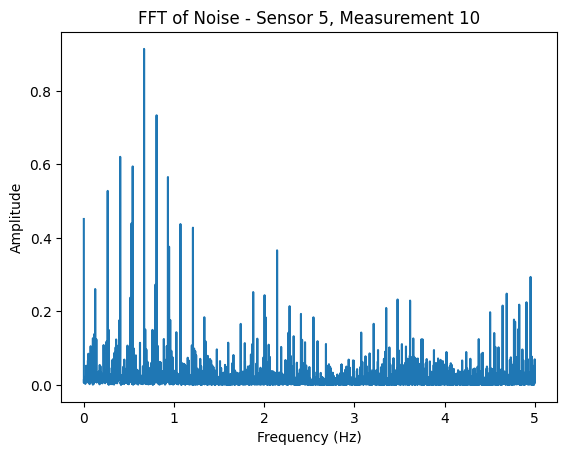

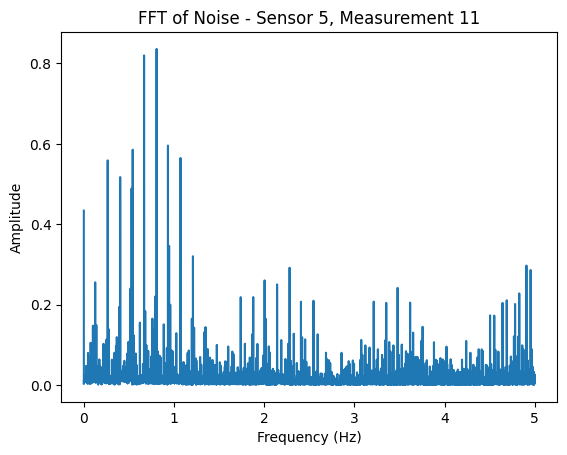

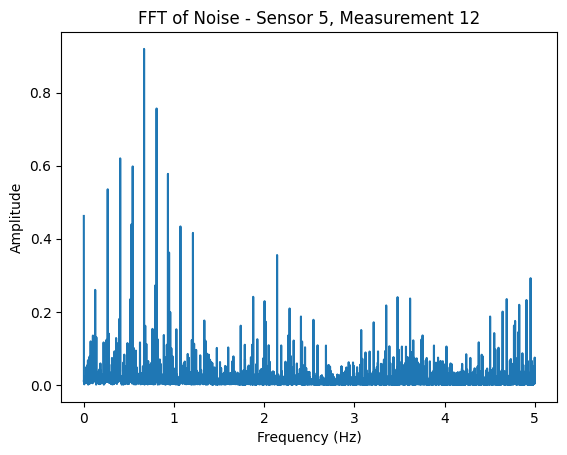

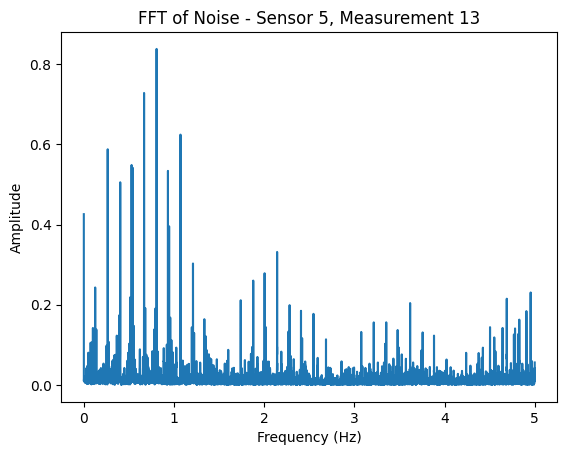

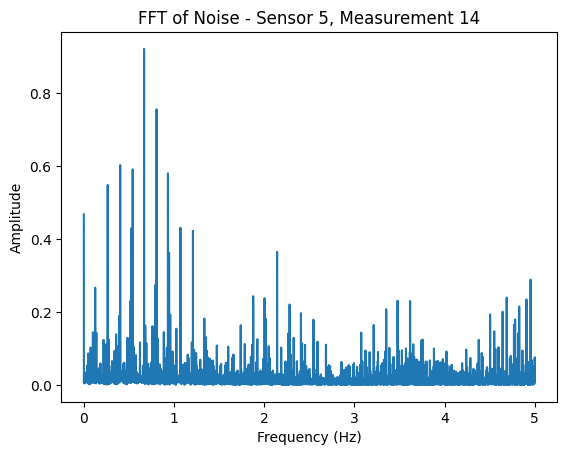

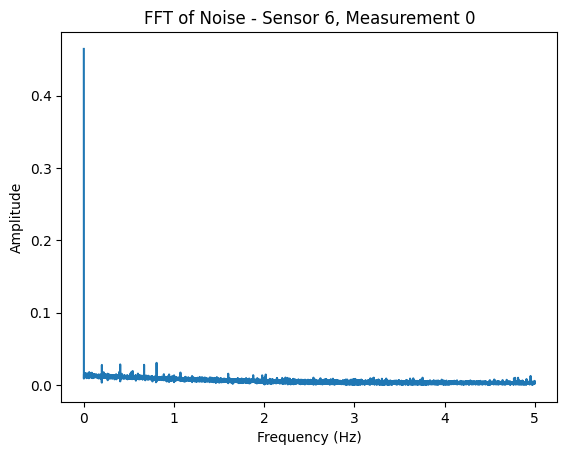

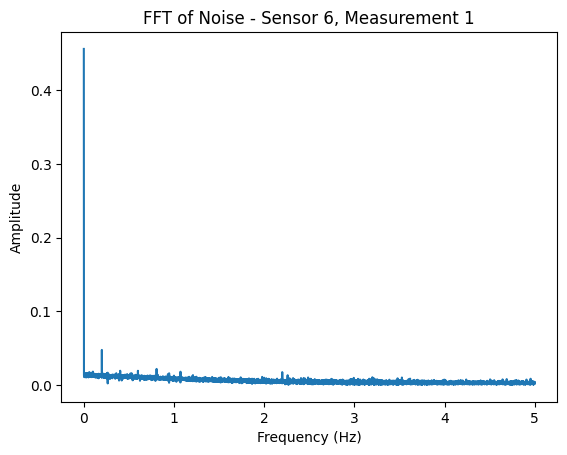

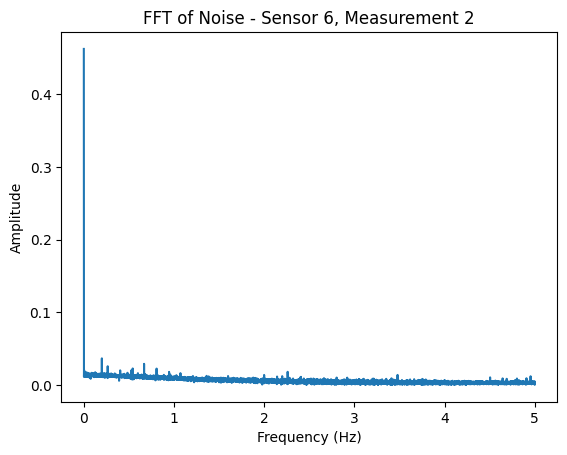

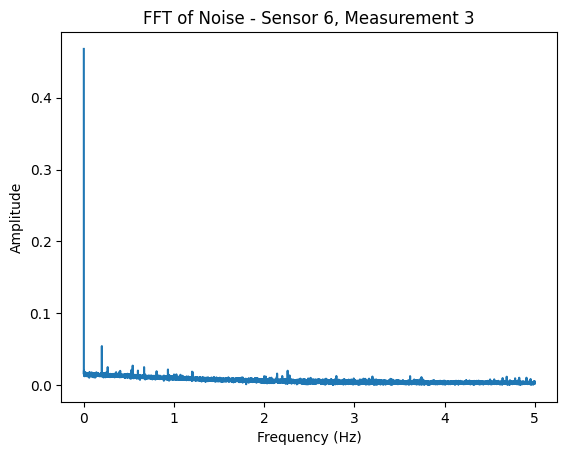

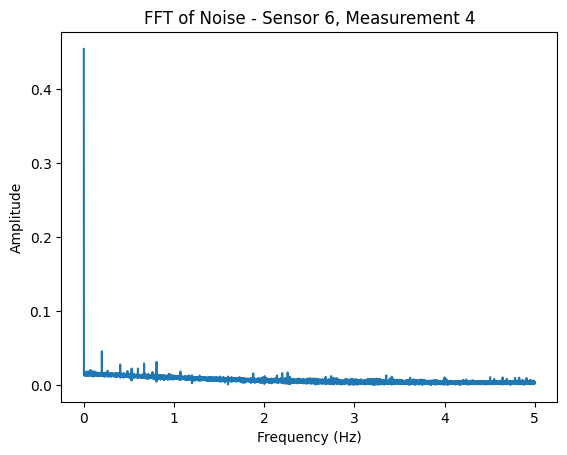

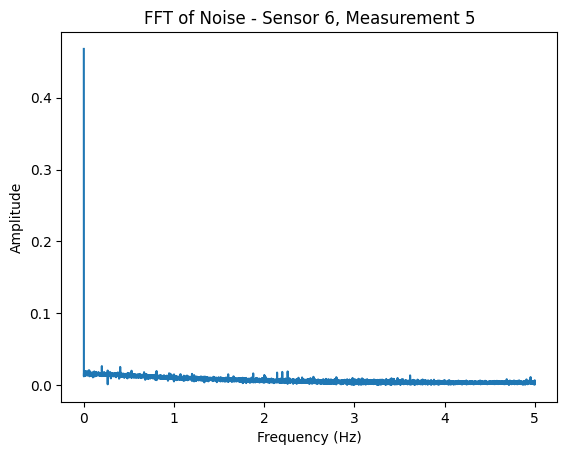

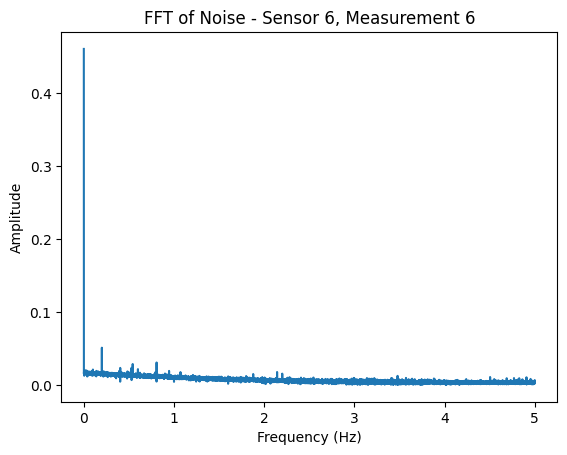

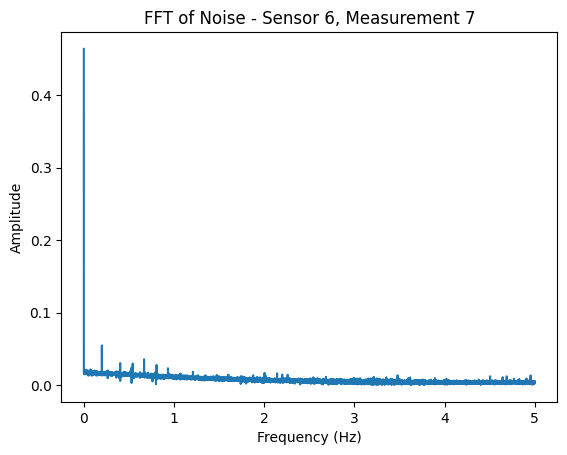

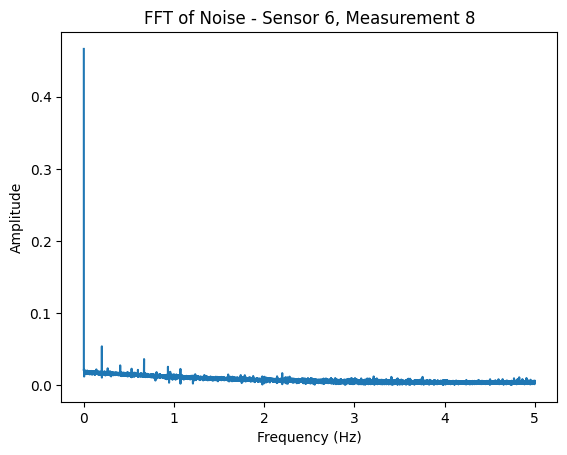

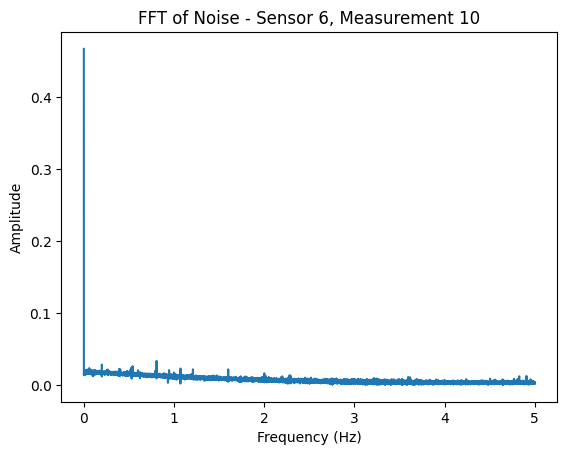

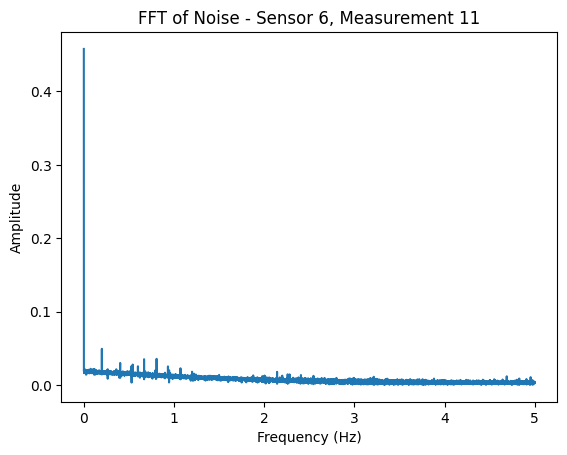

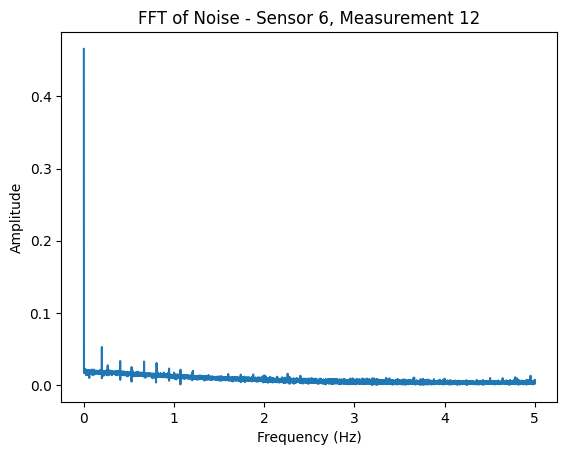

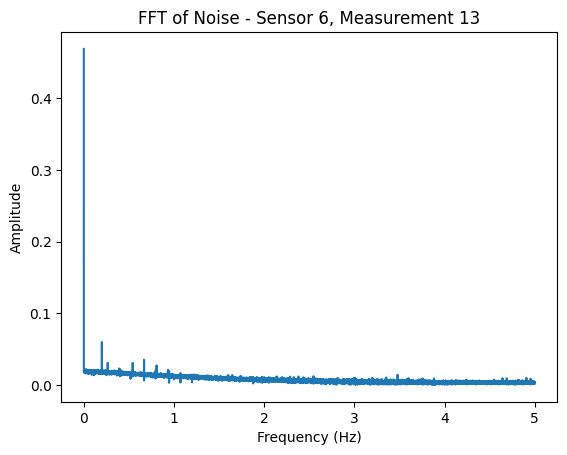

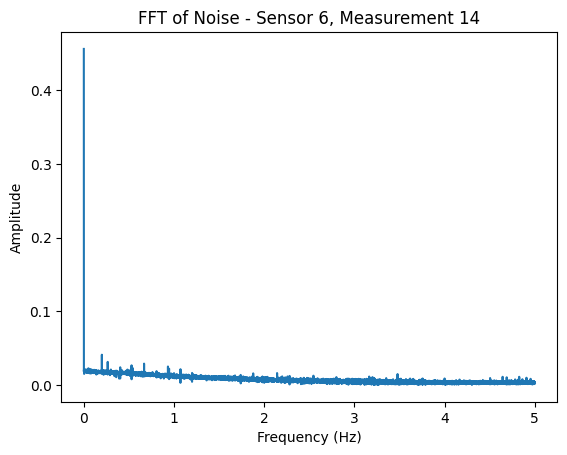

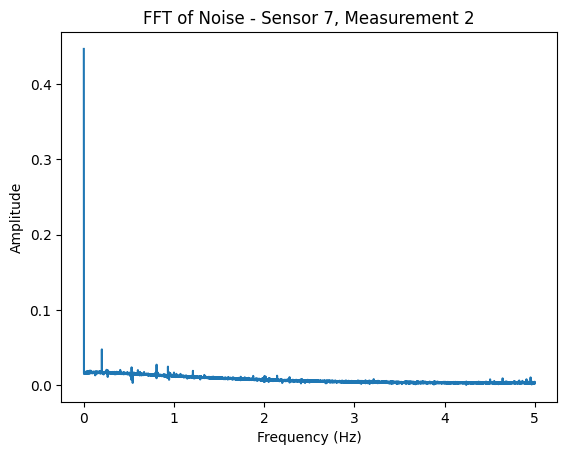

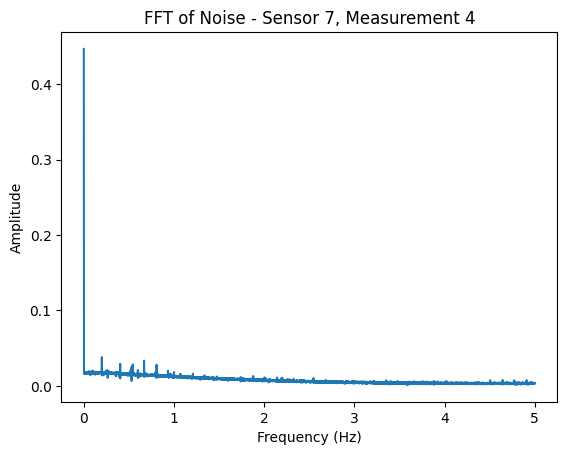

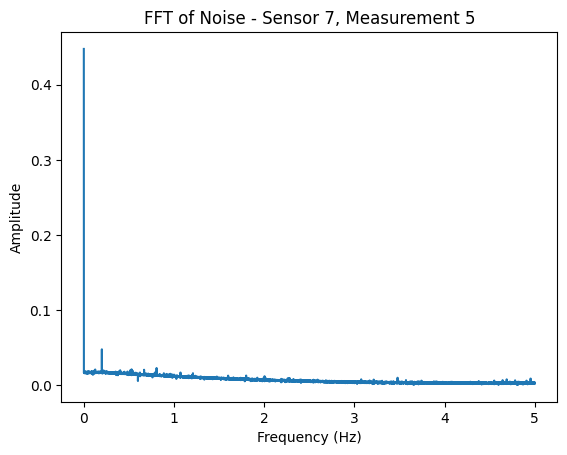

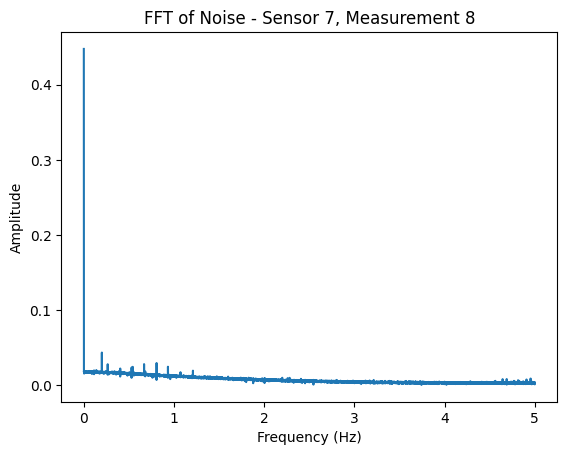

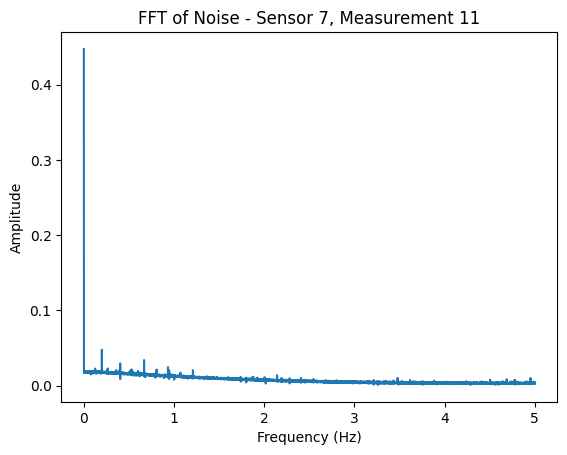

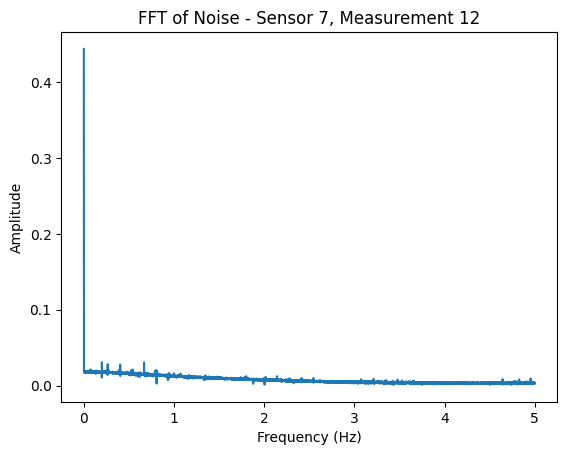

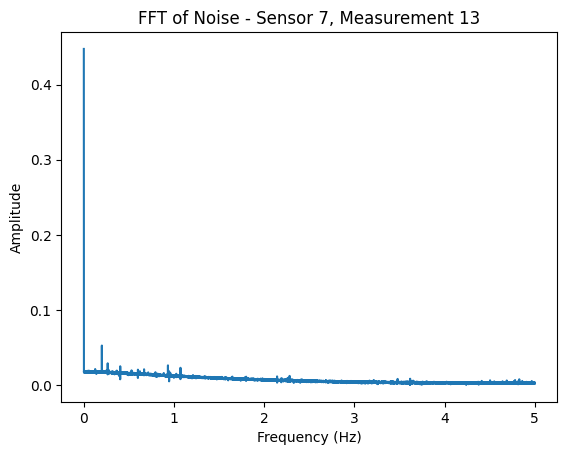

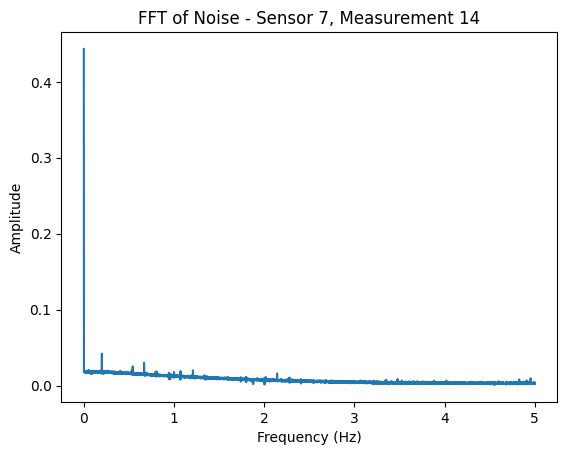

In [19]:
import numpy as np
import matplotlib.pyplot as plt

for i, dataframes in enumerate(sensor_dataframes):
    for j in range(15):
        fft_values = np.fft.fft(dataframes[j]["uA"])
        frequencies = dataframes[j]['V']
        plt.figure()
        plt.plot(frequencies[:len(frequencies)//2], np.abs(fft_values[:len(frequencies)//2])) # we divide by 2 because of the Nyquist limit
        plt.title(f"FFT of Noise - Sensor {i}, Measurement {j}")
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Amplitude")
        plt.show()

Note that Channel 5 exhibits highly periodic behavior - there are around 10 large amplitudes (at frequencies between 0 and around 1.25Hz), standing at above 0.4, and around 15 more medium-sized amplitudes at frequencies 2 or higher. This could represent some kind of systematic interference.

## 1.5. Correlation between Channels?

Before making a conclusion, I check if there is a correlation between the channels, i.e. whether the current grows/decreases at the same time!

In [26]:
#In this cell, for each measurement (0 through 14), I join the results for each sensor into one DataFrame. 
#The final result is a list of DataFrames called joint_measurements.
#I use this to compute the correlation matrix.

joint_measurements = []

for j in range(15):
    measurement_j_all = sensor_dataframes[0][j].copy()
    measurement_j_all.columns = ['V', 'uA_ch_0']
    for i in range(1,8):
        measurement_j_all[f'uA_ch_{i}'] = sensor_dataframes[i][j]['uA']
    measurement_j_all = measurement_j_all.set_index('V')
    joint_measurements.append(measurement_j_all)
    
joint_measurements

[          uA_ch_0   uA_ch_1       uA_ch_2   uA_ch_3   uA_ch_4   uA_ch_5  \
 V                                                                         
 0.0000   0.006229  0.006229  6.228781e-03 -0.006230  0.005873  0.004027   
 0.0004   0.005828  0.006229  5.039592e-03 -0.006230  0.004327  0.002898   
 0.0008   0.003109  0.004607  2.993142e-03 -0.004699  0.002619  0.001710   
 0.0012   0.001047  0.002474  1.497060e-03 -0.002627  0.001315  0.000835   
 0.0016   0.000137  0.001497  8.271488e-04 -0.001554  0.000739  0.000433   
 ...           ...       ...           ...       ...       ...       ...   
 9.9984  -0.000026 -0.000028  8.821520e-07 -0.000030 -0.000044 -0.000304   
 9.9988  -0.000034 -0.000012 -9.799041e-06 -0.000029 -0.000034 -0.000161   
 9.9992  -0.000029 -0.000025 -5.078336e-06 -0.000030 -0.000022 -0.000105   
 9.9996  -0.000030 -0.000007 -2.295980e-05 -0.000027 -0.000027 -0.000076   
 10.0000 -0.000045 -0.000010 -2.791892e-05 -0.000026 -0.000035 -0.000055   
 
          

In [27]:
correlation_matrices = []
for j in range(15):
    correlation_matrices.append(joint_measurements[j].corr())

correlation_matrices

[          uA_ch_0   uA_ch_1   uA_ch_2   uA_ch_3   uA_ch_4   uA_ch_5   uA_ch_6  \
 uA_ch_0  1.000000  0.888029  0.923285 -0.904337  0.915952  0.186263  0.896410   
 uA_ch_1  0.888029  1.000000  0.954754 -0.985920  0.944621  0.190500  0.922051   
 uA_ch_2  0.923285  0.954754  1.000000 -0.963252  0.961240  0.192966  0.937335   
 uA_ch_3 -0.904337 -0.985920 -0.963252  1.000000 -0.952179 -0.192145 -0.929641   
 uA_ch_4  0.915952  0.944621  0.961240 -0.952179  1.000000  0.201003  0.935570   
 uA_ch_5  0.186263  0.190500  0.192966 -0.192145  0.201003  1.000000  0.187837   
 uA_ch_6  0.896410  0.922051  0.937335 -0.929641  0.935570  0.187837  1.000000   
 uA_ch_7  0.947049  0.957783  0.974590 -0.966400  0.968214  0.193293  0.947582   
 
           uA_ch_7  
 uA_ch_0  0.947049  
 uA_ch_1  0.957783  
 uA_ch_2  0.974590  
 uA_ch_3 -0.966400  
 uA_ch_4  0.968214  
 uA_ch_5  0.193293  
 uA_ch_6  0.947582  
 uA_ch_7  1.000000  ,
           uA_ch_0   uA_ch_1   uA_ch_2   uA_ch_3   uA_ch_4   uA_ch_5  

**Important Observation:** the Pearson coefficients are very high (over 0.9), except when one of the channels is no. 5, when it's between 0.1 and 0.2! This is another indicator that this channel is corrupted.

**Observation 2:** channel 3 is *negatively* correlated with the others! Probably due to the negative current for low voltages!

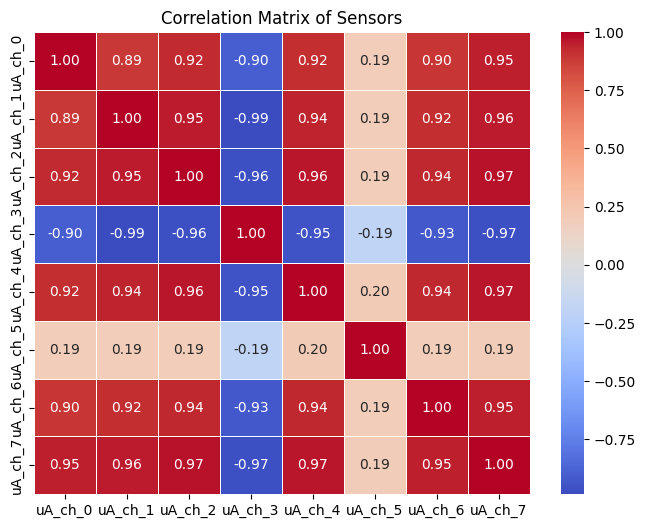

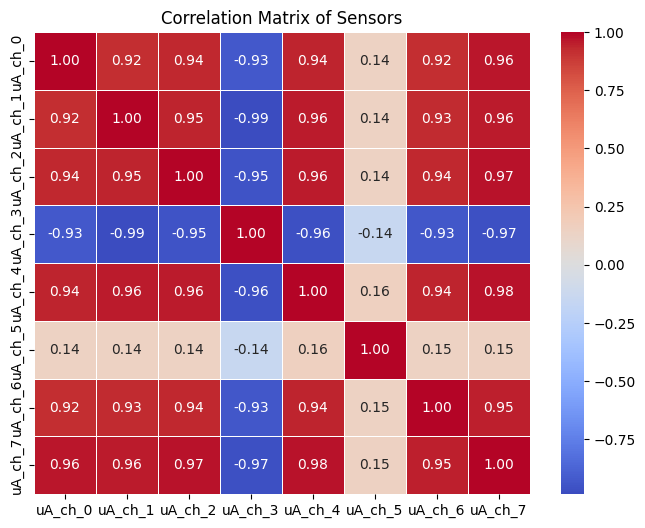

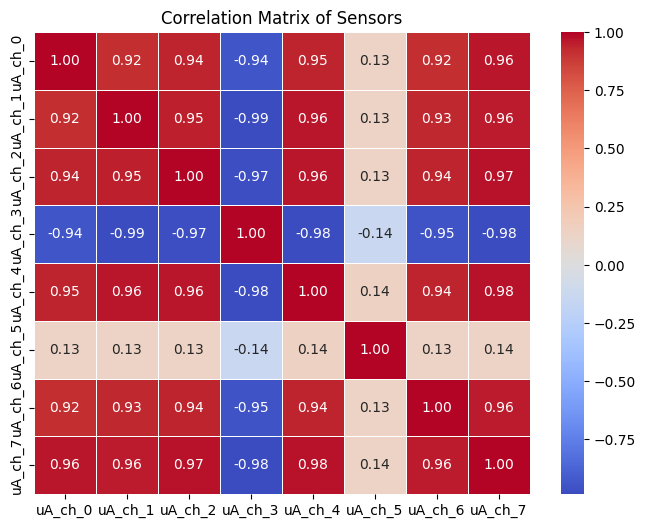

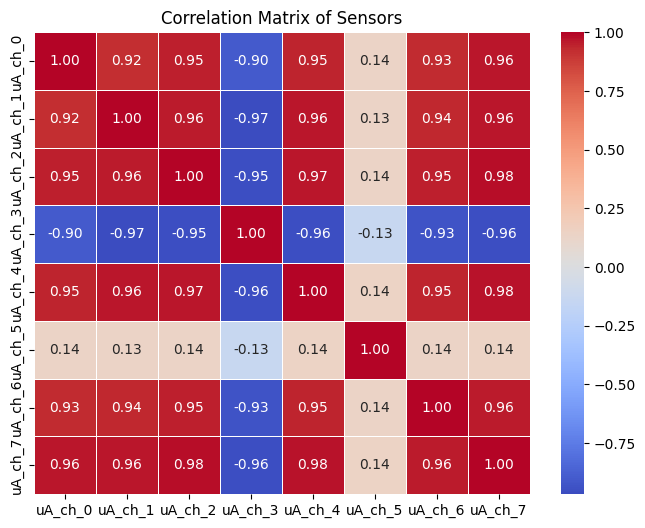

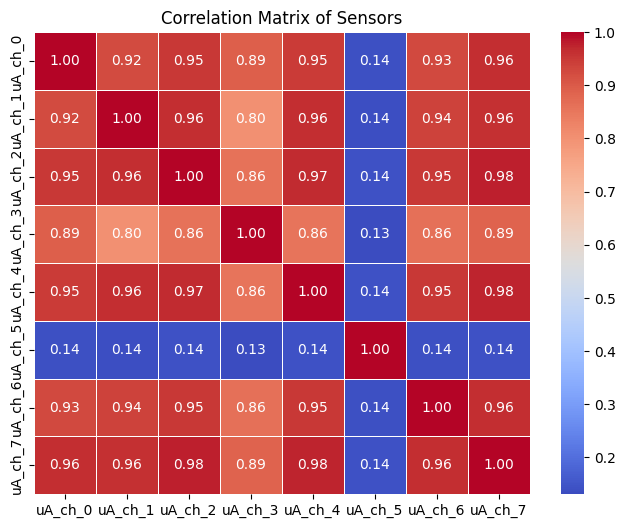

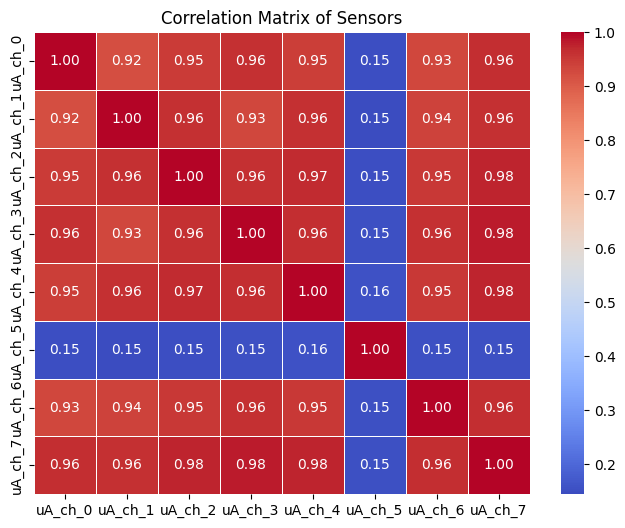

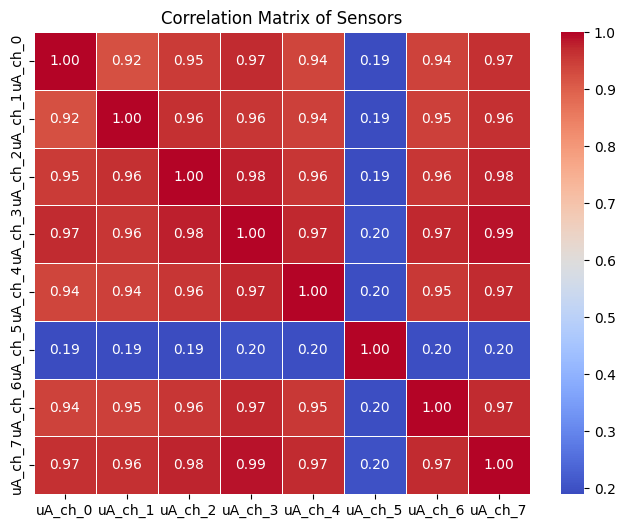

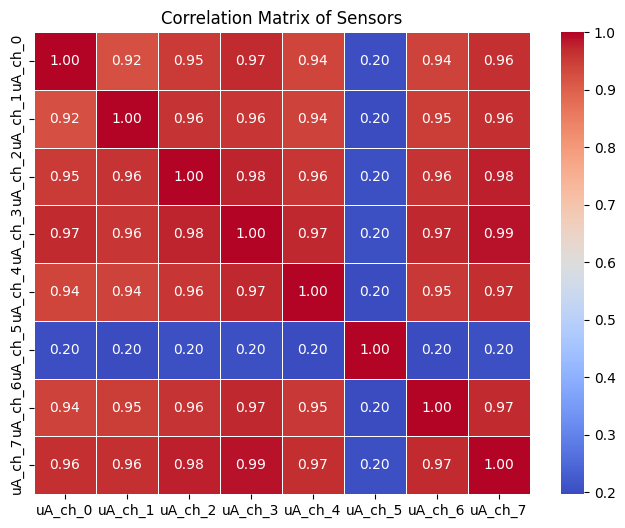

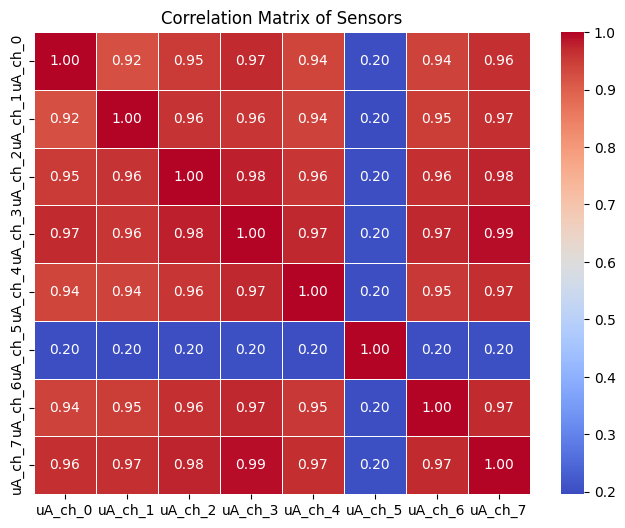

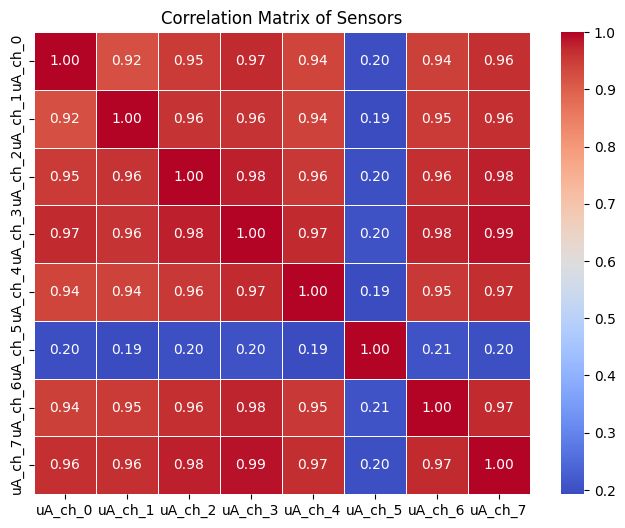

In [31]:
# We plot a heatmap...

import seaborn as sns
import matplotlib.pyplot as plt

for j in range(15):
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrices[j], annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
    plt.title("Correlation Matrix of Sensors")
    plt.show()

## 1.6. Conclusion

All of the experiments run above (explicitly plotting the DataFrames, computing the standard deviations and SNRs, Z-scores, DFT, correlation coefficients) consistently lead us to the following conclusions:
- Channel 5 is corrupted and displays around 50 times higher current than the other channels, probably due to some kind of systematic interference. I cannot say if there is a problem with the sensor or the way it's being measured. Both should be checked.
- The othe 